# Assignment 2 – Kaggle Challenge - Credit Scoring Analysis

___
### Hello hello, here is the list of everything that you will see in this notebook!!
___
Let's have a look:
1. Data Loading & Visualization
2. Separation of X and Y
2. Data Preprocessing
    - Outlier Handling with transformations
    - Normalization
    - Encoding X Categorical Variables
    - Encoding Y
    - Data reduction??
3. Feature Engineering
    - Study of correlation between features and Y
    - Feature selection
    - Creating new features??
4. Split of dataset into Training set and Validation set

5. Model: Neural Network Regression
    - Training
    - Evaluation
    - Hyperparameter tuning??
6. Generation of the CSV for submission

*Note: The steps with "??" are propositions that are not done yet.*


# Data Loading
This section is for loading the training dataset into a pandas DataFrame, and checking for duplicates and missing values.

In [1]:
import pandas as pd
import numpy as np

# Load the training data
train_set_csv = pd.read_csv('Data/train_set.csv')
display(train_set_csv.head())

# Understand shape of data
print(f'Shape: {train_set_csv.shape}')

# Check for duplicates
num_duplicates = train_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = train_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


Shape: (70000, 28)
Number of duplicate rows: 0
Number of missing values: 0


# Data Visualization
Function to visualize each column in the dataset to understand their distributions and characteristics.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

def plot_columns(df_to_plot):
    """
    Function to plot each column of a dataframe.
    For numerical data: creates a boxplot and histogram.
    For categorical data:
        - Bar chart if less than or equal to 15 categories.
        - Text info about the number of categories if more than 15 categories.

    Parameters:
    df_to_plot: DataFrame
        The dataframe to visualize.
    """

    print(f'\n\nShape of the dataframe: {df_to_plot.shape}\n\n\n')

    # Set the aesthetics for the plots
    sns.set(style="darkgrid")

    # Number of columns for the main grid
    n_cols = 3

    # Adjust the number of rows considering the layout for numerical data
    n_rows = int(np.ceil(len(df_to_plot.columns) / n_cols)) * 2

    # Create grid
    plt.figure(figsize=(15, n_rows * 2))
    grid = gridspec.GridSpec(n_rows, n_cols, figure=plt.gcf(), hspace=1.5, wspace=0.5)

    # Loop through each column in the dataframe
    for i, column in enumerate(df_to_plot.columns):
        # Calculate row index considering the new layout
        row_idx = (i // n_cols) * 2
        col_idx = i % n_cols

        # Numeric data
        if np.issubdtype(df_to_plot[column].dtype, np.number):
            # Nested grid for so that histogram is 7 times higher than boxplot
            nested_grid = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=grid[row_idx:row_idx + 2, col_idx], hspace=0.1)

            # Boxplot
            ax_box = plt.subplot(nested_grid[0])
            sns.boxplot(x=df_to_plot[column], ax=ax_box)
            ax_box.set_title(column, fontsize=16)
            ax_box.set_xlabel('')

            # Histogram
            ax_hist = plt.subplot(nested_grid[1:])
            sns.histplot(df_to_plot[column], bins=30, ax=ax_hist)
            ax_hist.set_title("")
            ax_hist.set_xlabel('')

        else:
            # Categorical data
            if df_to_plot[column].nunique() <= 15:
                # Bar chart
                ax_bar = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                sns.countplot(x=df_to_plot[column], ax=ax_bar)
                ax_bar.set_title(column, fontsize=16)
                ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45)
                ax_bar.set_xlabel('')

            else:
                # Display text information for categories more than 15
                ax_text = plt.subplot(grid[row_idx:row_idx + 2, col_idx])
                top_categories = df_to_plot[column].value_counts().head(5)
                text_str = f'Number of categories: {df_to_plot[column].nunique()}\n\nTop 5 categories:\n{top_categories.to_string()}'
                ax_text.text(0.5, 0.5, text_str, ha='center', va='center', fontsize=12)
                ax_text.axis('off')
                ax_text.set_title(column, fontsize=16)

    # Adjust layout to fit everything
    plt.tight_layout()
    plt.show()


# Separation of X and Y

In [3]:
# Extract the feature columns (X)
X = train_set_csv.drop(columns=['Credit_Score'])

# Extract the targ[et column (y)
Y = train_set_csv[['Credit_Score']]



Shape of the dataframe: (70000, 27)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14124\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


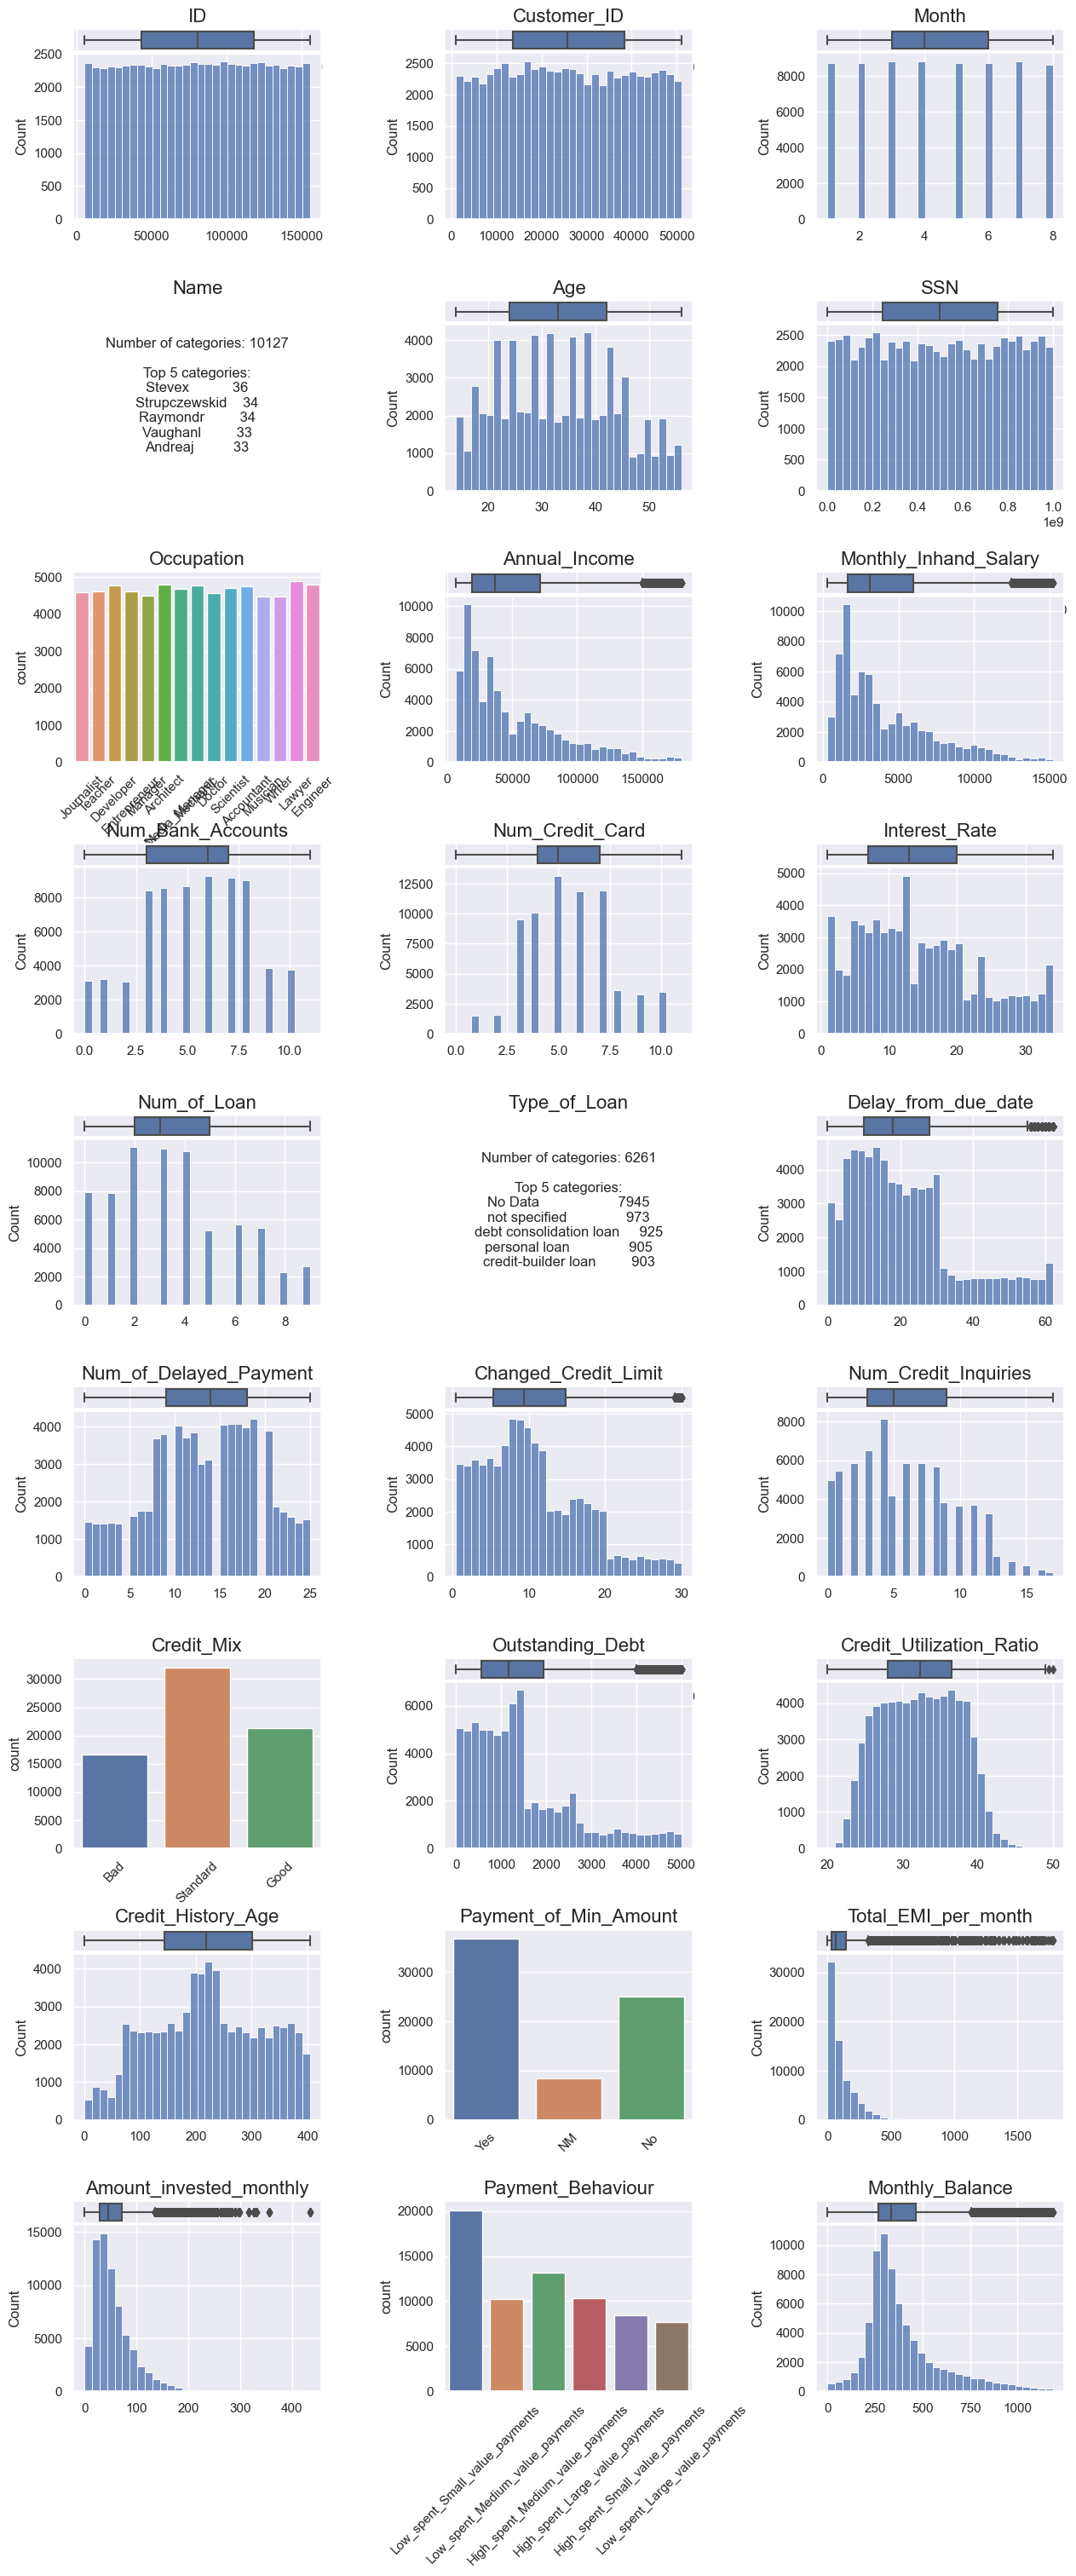

In [4]:
plot_columns(X)



Shape of the dataframe: (70000, 1)





C:\Users\Markou\AppData\Local\Temp\ipykernel_14124\3518248179.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


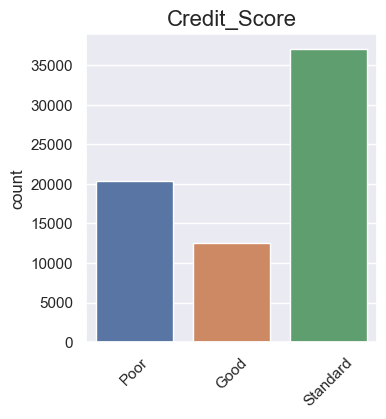

In [5]:
plot_columns(Y)

# Data Preprocessing

**WARNING: DO NOT RUN THE SAME CELL TWICE, AS THE TRANSFORMATION MAY BE APPLIED TWICE.**

If you have made a modification, run each cell from here to re-create the X_preprocessed from X.
___
Input: X, Y

Output: X_preprocessed, Y_processed.
___

Steps:
- Numerical features
  - Outlier Handling (log and sqrt)
  - Normalization
- Categorical variables
  - Encoding (One-Hot, Ordinal, etc)


## Outlier Handling with Transformations
In this step, we apply transformations to certain financial features to reduce the impact of outliers.

We use the log transformation and the sqrt transformation, which are effective for skewed data.

In [6]:
def preprocess_outliers(X):

  # SQRT
  columns_to_sqrt = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']
  for col in columns_to_sqrt:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (SQRT)', X[col].apply(np.sqrt))
      X.drop(col, axis=1, inplace=True)

  # LOG
  columns_to_log = ['Total_EMI_per_month', 'Amount_invested_monthly']
  for col in columns_to_log:
      insert_index = X.columns.get_loc(col)
      X.insert(insert_index + 1, col + ' (LOG)', X[col].apply(lambda x: np.log(x + 1)))
      X.drop(col, axis=1, inplace=True)

  return X



## Normalization
This step has to come after having applied log and sqrt to make the distributions more normal. Indeed, if we standardize first, the outliers will still have a significant effect on the mean and standard deviation, potentially leading to less effective standardization.

In [7]:
from sklearn.preprocessing import StandardScaler

def preprocess_normalization(X):
  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Selecting numerical columns
  numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

  # Applying StandardScaler to the numerical columns
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

  return X



## Encoding X categorical variables
In this section, we are encoding the categorical variables using different techniques based on the nature of each variable.
These encoding steps are essential for converting categorical data into a format that can be effectively used by various machine learning algorithms.

In [8]:
# We are going to use 
from sklearn.preprocessing import LabelEncoder



#### Column "Occupation" (One-Hot Encoding)

___

Converted to 15 columns ('Occupation_Journalist', 'Occupation_Teacher'...), with 1 column having a 1 and 14 columns having a 0.

Reason: No natural ordered relationship betweend those categories.

___

**Example:**

|Occupation|
|-|
|"Teacher"|

Is encoded as:

| Occupation_Accountant | Occupation_Architect | Occupation_Developer | Occupation_Doctor | Occupation_Engineer | Occupation_Entrepreneur | Occupation_Journalist | Occupation_Lawyer | Occupation_Manager | Occupation_Mechanic | Occupation_Media_Manager | Occupation_Musician | Occupation_Scientist | Occupation_Teacher | Occupation_Writer |
|-----------------------|----------------------|----------------------|------------------|---------------------|------------------------|---------------------|-----------------|-----------------|--------------------|---------------------------|--------------------|-------------------|------------------|-----------------|
| 0                     | 0                    | 0                    | 0                | 0                   | 0                      | 0                   | 0               | 0               | 0                  | 0                         | 0                  | 0                 | 1                | 0               |


In [9]:
X

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.200,5564.016667,9.0,...,8.0,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.590,1258.132500,7.0,...,12.0,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.310,707.692500,7.0,...,5.0,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.620,7022.135000,0.0,...,3.0,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.920,10508.076667,5.0,...,1.0,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,100440,34564,7,Daniel Basesv,31.0,497367729.0,Mechanic,76726.640,6098.886667,6.0,...,3.0,Standard,103.86,22.988139,353.0,No,145.229101,56.871503,High_spent_Medium_value_payments,490.055738
69996,97738,11931,5,Palmery,15.0,68740168.0,Engineer,29735.220,2208.935000,10.0,...,10.0,Bad,1750.14,34.177601,234.0,Yes,64.477076,52.468341,Low_spent_Small_value_payments,265.301240
69997,32228,14790,3,Johnsonj,37.0,959945192.0,Engineer,16833.355,1395.779583,7.0,...,8.0,Standard,65.59,31.230439,127.0,Yes,19.785558,14.823454,Low_spent_Small_value_payments,295.742037
69998,47676,10962,7,Erin Smithu,32.0,193636325.0,Journalist,34947.630,3022.302500,3.0,...,3.0,Standard,936.29,23.539433,201.0,No,77.862907,108.987267,Low_spent_Small_value_payments,251.420052


In [10]:
def encoding_occupation(X, type):
  if (type == "ordinal_hot"): 
    # Creating 15 columns 'Occupation_Journalist', 'Occupation_Teacher', ...
    occupation_dummies = pd.get_dummies(X['Occupation'], prefix='Occupation')
    #Adding the columns generated at the right place in the df
    insert_index = X.columns.get_loc('Occupation')
    df_left = X.iloc[:, :insert_index]
    df_right = X.iloc[:, insert_index:]
    X = pd.concat([df_left, occupation_dummies, df_right], axis=1)

    # Drop the original column
    X.drop(['Occupation'], axis=1, inplace=True)
    return X
  
  elif (type == "ordinal"):
    # Use the Sklearn label encoder to encode the categorical variable.
    label_encoder =  LabelEncoder()
    X["occupation_label"] = label_encoder.fit_transform(X["Occupation"])
    X = X.drop("Occupation", axis=1)
    return X
    

#### Column "Payment_of_Min_Amount" (One-Hot Encoding)
___

Converted to 2 columns ("Payment_of_Min_Amount_Yes", "Payment_of_Min_Amount_NM"), with at least a 0 in one column.

Reason: No natural ordered relationship betweend those categories.

*Note: The column Payment_of_Min_Amount_No is dropped, as it was redundant with Payment_of_Min_Amount_Yes*

___

**Example:**

| Payment_of_Min_Amount |
| - |
|"No"|

Is encoded as:

|Payment_of_Min_Amount_Yes|Payment_of_Min_Amount_NM|
|-|-|
| 0 | 0 |

In [11]:
def encoding_payment_of_min_amount(X, type):
  if (type == "ordinal_hot"):
    # Creating 2 columns 'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_NM'
    payment_min_amount_dummies = pd.get_dummies(X['Payment_of_Min_Amount'], prefix='Payment_of_Min_Amount')
    #Adding the columns generated at the right place in the df
    insert_index = X.columns.get_loc('Payment_of_Min_Amount')
    df_left = X.iloc[:, :insert_index]
    df_right = X.iloc[:, insert_index:]
    X = pd.concat([df_left, payment_min_amount_dummies, df_right], axis=1)
    #Drop the column No as it is redundant with Yes
    X.drop('Payment_of_Min_Amount_No', axis=1, inplace=True)

    # Drop the original column
    X.drop(['Payment_of_Min_Amount'], axis=1, inplace=True)
    return X
  
  elif (type == "ordinal"):
    # Use the Sklearn label encoder to encode the categorical variable.
    label_encoder =  LabelEncoder()
    X["Payment_of_Min_Amount_label"] = label_encoder.fit_transform(X["Payment_of_Min_Amount"])
    X = X.drop("Payment_of_Min_Amount", axis=1)
    return X
  


#### Column "Credit_Mix" (Ordinal Encoding)

___
Converted to 1 column containing either 1, 2 or 3.

Reason: Natural ordered relationship.
___

**Example:**

|Credit_Mix|
|-|
|"Standard"|

Is encoded as:

|Credit_Mix|
|-|
| 2 |

In [12]:
def encoding_credit_mix(X):

  # Mapping for ordinal encoding
  credit_mix_mapping = {'Bad': 1, 'Standard': 2, 'Good': 3}

  # Applying ordinal encoding
  X['Credit_Mix'] = X['Credit_Mix'].map(credit_mix_mapping)

  return X

#### Column "Payment_Behaviour" (double ordinal encoding)
___

Converted to 2 columns: "Payment_Behaviour_Spent" being either 0 or 1 and "Payment_Behaviour_Value" being either 1, 2 or 3.

Reason: The values of this column are strings that represent 2 ordinal features.
___

**Example:**

|Credit_Score|
|-|
|"High_spent_Medium_value_payments"|

Is encoded as:

|Payment_Behaviour_Spent|Payment_Behaviour_Value|
|-|-|
| 1 |2|

In [13]:
#PAYMENT_BEHAVIOUR

def mapping_payment_behaviour(value):
    mapping = {
        'Low_spent_Small_value_payments': (0, 1),
        'Low_spent_Medium_value_payments': (0, 2),
        'Low_spent_Large_value_payments': (0, 3),
        'High_spent_Small_value_payments': (1, 1),
        'High_spent_Medium_value_payments': (1, 2),
        'High_spent_Large_value_payments': (1, 3)
    }
    return mapping.get(value)

def encode_payment_behaviour(X):

  # Find the index of the original column
  col_index = X.columns.get_loc('Payment_Behaviour')

  # Vectorize the mapping to new columns
  columns_to_add = list(zip(*X['Payment_Behaviour'].map(mapping_payment_behaviour)))

  # Insert the new columns at the original column's place
  X.insert(col_index, 'Payment_Behaviour_Spent', columns_to_add[0])
  X.insert(col_index + 1, 'Payment_Behaviour_Value', columns_to_add[1])

  # Drop the original column
  X.drop(['Payment_Behaviour'], axis=1, inplace=True)

  return X

#### Column "Type_of_Loan" (Multi-Label One-Hot Encoding)
___
Converted to 10 columns ("Type_of_loan (home equity loan)", "Type_of_Loan (credit-builder loan)"...), including one column "not specified" and one column "no data", where each row can have multiple values 1.

Reason: The values of this column are strings that can specify multiple types of loan that the person has.
___

**Example:**

|Credit_Score|
|-|
|"payday loan,mortgage loan,student loan,not specified,home equity loan"|

Is encoded as:

| Type_of_Loan (home equity loan)       | Type_of_Loan (credit-builder loan)   | Type_of_Loan (auto loan)         | Type_of_Loan (mortgage loan)     | Type_of_Loan (not specified)     | Type_of_Loan (payday loan)       | Type_of_Loan (student loan)     | Type_of_Loan (No Data)          | Type_of_Loan (debt consolidation loan) | Type_of_Loan (personal loan)   |
|--------------------------------------|-------------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|-------------------------------------------|------------------------------|
| 1                                    | 0                                   | 0                                | 1                                | 1                                | 1                                | 1                                | 0                                | 0                                         | 0                            |


In [14]:
def encode_type_of_loan(X):

  # Split the string on commas and create a list of loan types
  X['Type_of_Loan'] = X['Type_of_Loan'].str.split(',')

  # Identify all unique loan types
  unique_loan_types = set()
  for loan_list in X['Type_of_Loan']:
      unique_loan_types.update(loan_list)

  # Create binary columns for each loan type
  for loan_type in unique_loan_types:
      name_of_new_column = f'Type_of_Loan ({loan_type})'
      new_column = X['Type_of_Loan'].apply(lambda x: 1 if loan_type in x else 0)
      insert_index = X.columns.get_loc("Type_of_Loan")
      X.insert(insert_index, name_of_new_column, new_column)

  # Drop the original column
  X.drop('Type_of_Loan', axis=1, inplace=True)

  return X

## Encoding Y

#### Column "Credit_Score"

___
Converted to 1 column containing either 1, 2 or 3.

Reason: Natural ordered relationship.
___

**Example:**

|Credit_Score|
|-|
|"Poor"|

Is encoded as:

|Credit_Score|
|-|
| 1 |

In [15]:
def encode_Y(Y, encoding_type):

  if encoding_type == "ordinal_label":
    # Mapping for ordinal encoding
    credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_Encoded']

  elif encoding_type == "ordinal_hot":
    # Special mapping for ordinal encoding, see https://stackoverflow.com/questions/38375401/neural-network-ordinal-classification-for-age
    credit_score_mapping = {'Poor': [0, 0], 'Standard': [1, 0], 'Good': [1, 1]}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_1', 'Credit_Score_2']

  elif encoding_type == "one_hot":
    # Mapping for one hot encoding
    credit_score_mapping = {'Poor': [1, 0, 0], 'Standard': [0, 1, 0], 'Good': [0, 0, 1]}
    encoded_Y = pd.DataFrame(Y['Credit_Score'].map(credit_score_mapping).tolist(), index=Y.index)
    encoded_Y.columns = ['Credit_Score_1', 'Credit_Score_2', 'Credit_Score_3']

  else:
    print("Wrong encoding asked")

  return encoded_Y

### Piping preprocessing functions

In [16]:
def full_preprocess_X(X, encoding_type):

  X = X.copy() # So that the function doesn't change the original X variable

  #X = preprocess_outliers(X)
  X = preprocess_normalization(X)
  X = encoding_credit_mix(X)
  X = encode_payment_behaviour(X)
  X = encode_type_of_loan(X)
  X = encoding_occupation(X, encoding_type)
  X = encoding_payment_of_min_amount(X, encoding_type)
  return X

def full_preprocess_Y(Y, encoding_type):
  Y = Y.copy() # So that the function doesn't change the original Y variable

  Y = encode_Y(Y, encoding_type)

  return Y

## Creating the preprocessed sets

In [17]:
X_preprocessed = full_preprocess_X(X, "ordinal_hot")
Y_preprocessed = full_preprocess_Y(Y, "ordinal_hot")

#plot_columns(X_preprocessed)
#plot_columns(Y_preprocessed)

In [18]:
# Make sure that we haven't forgotten any feature during the preprocessing compared to the original X.

#print(f'Original columns before processing: {X.columns}\n')

# Feature Engineering
- In this Section we are going to expirement with the creation of new 


In [19]:
train_set_csv

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.200,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.590,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.310,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.620,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.920,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,100440,34564,7,Daniel Basesv,31.0,497367729.0,Mechanic,76726.640,6098.886667,6.0,...,Standard,103.86,22.988139,353.0,No,145.229101,56.871503,High_spent_Medium_value_payments,490.055738,Standard
69996,97738,11931,5,Palmery,15.0,68740168.0,Engineer,29735.220,2208.935000,10.0,...,Bad,1750.14,34.177601,234.0,Yes,64.477076,52.468341,Low_spent_Small_value_payments,265.301240,Poor
69997,32228,14790,3,Johnsonj,37.0,959945192.0,Engineer,16833.355,1395.779583,7.0,...,Standard,65.59,31.230439,127.0,Yes,19.785558,14.823454,Low_spent_Small_value_payments,295.742037,Standard
69998,47676,10962,7,Erin Smithu,32.0,193636325.0,Journalist,34947.630,3022.302500,3.0,...,Standard,936.29,23.539433,201.0,No,77.862907,108.987267,Low_spent_Small_value_payments,251.420052,Standard


In [20]:
df_standard = train_set_csv.query("Credit_Score == 'Standard'")

In [21]:
df_standard

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.620,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.920,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard
5,118904,20397,3,Lynchf,30.0,699918597.0,Architect,31517.470,2484.455833,7.0,...,Standard,39.28,37.115652,101.0,NM,85.356930,30.612023,High_spent_Medium_value_payments,324.224129,Standard
6,128709,35135,4,Qing Kevinb,43.0,437409812.0,Media_Manager,53956.320,4514.360000,4.0,...,Standard,432.92,41.709141,265.0,Yes,158.845578,68.116022,High_spent_Medium_value_payments,369.714501,Standard
7,137094,39898,1,"ODonnell""v",30.0,957888642.0,Entrepreneur,15628.590,1213.382500,1.0,...,Good,883.38,29.003008,260.0,No,21.271029,12.662838,Low_spent_Small_value_payments,308.921406,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69990,38995,44075,2,illg,40.0,80404889.0,Teacher,15723.705,1191.308750,7.0,...,Standard,632.13,27.081603,233.0,No,29.313068,17.788008,Low_spent_Small_value_payments,320.992862,Standard
69991,139584,46537,7,Alexeit,29.0,259884054.0,Musician,8826.660,508.555000,10.0,...,Bad,3851.63,26.551644,106.0,Yes,46.288522,10.508053,High_spent_Medium_value_payments,244.058925,Standard
69995,100440,34564,7,Daniel Basesv,31.0,497367729.0,Mechanic,76726.640,6098.886667,6.0,...,Standard,103.86,22.988139,353.0,No,145.229101,56.871503,High_spent_Medium_value_payments,490.055738,Standard
69997,32228,14790,3,Johnsonj,37.0,959945192.0,Engineer,16833.355,1395.779583,7.0,...,Standard,65.59,31.230439,127.0,Yes,19.785558,14.823454,Low_spent_Small_value_payments,295.742037,Standard


In [22]:
t = train_set_csv.query("Customer_ID == 46537").sort_values(by="Credit_History_Age")
t

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31018,139578,46537,1,Alexeit,28.0,259884054.0,Musician,8826.66,508.555,10.0,...,Bad,3851.63,26.352005,100.0,Yes,46.288522,10.508053,Low_spent_Small_value_payments,254.349922,Standard
24631,139581,46537,4,Alexeit,29.0,259884054.0,Musician,8826.66,508.555,10.0,...,Bad,3851.63,24.817120,103.0,Yes,46.288522,10.508053,Low_spent_Large_value_payments,238.068222,Standard
49877,139583,46537,6,Alexeit,29.0,259884054.0,Musician,8826.66,508.555,10.0,...,Bad,3851.63,35.853421,105.0,Yes,46.288522,10.508053,Low_spent_Medium_value_payments,267.474111,Standard
69991,139584,46537,7,Alexeit,29.0,259884054.0,Musician,8826.66,508.555,10.0,...,Bad,3851.63,26.551644,106.0,Yes,46.288522,10.508053,High_spent_Medium_value_payments,244.058925,Standard
51111,139585,46537,8,Alexeit,29.0,259884054.0,Musician,8826.66,508.555,10.0,...,Bad,3851.63,39.314693,107.0,Yes,46.288522,10.508053,Low_spent_Small_value_payments,247.547766,Standard


In [23]:
t = train_set_csv.query("Customer_ID == 39898").sort_values(by="Credit_History_Age")
t

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,137094,39898,1,"ODonnell""v",30.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,29.003008,260.0,No,21.271029,12.662838,Low_spent_Small_value_payments,308.921406,Standard
34908,137095,39898,2,"ODonnell""v",30.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,22.492447,261.0,No,21.271029,12.662838,Low_spent_Small_value_payments,227.712424,Good
22048,137096,39898,3,"ODonnell""v",30.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,25.781679,262.0,No,21.271029,12.662838,Low_spent_Small_value_payments,336.789676,Good
33503,137097,39898,4,"ODonnell""v",31.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,24.573771,263.0,No,21.271029,12.662838,Low_spent_Small_value_payments,261.694228,Standard
7216,137099,39898,6,"ODonnell""v",31.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,27.629206,265.0,No,21.271029,12.662838,High_spent_Small_value_payments,325.724945,Good
39641,137100,39898,7,"ODonnell""v",31.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,23.673925,266.0,No,21.271029,12.662838,Low_spent_Medium_value_payments,339.003205,Standard
62067,137101,39898,8,"ODonnell""v",31.0,957888642.0,Entrepreneur,15628.59,1213.3825,1.0,...,Good,883.38,22.965565,267.0,No,21.271029,12.662838,Low_spent_Small_value_payments,300.142170,Standard


## History of the Credit Holder

## Understanding correlation of features with the Credit_Score

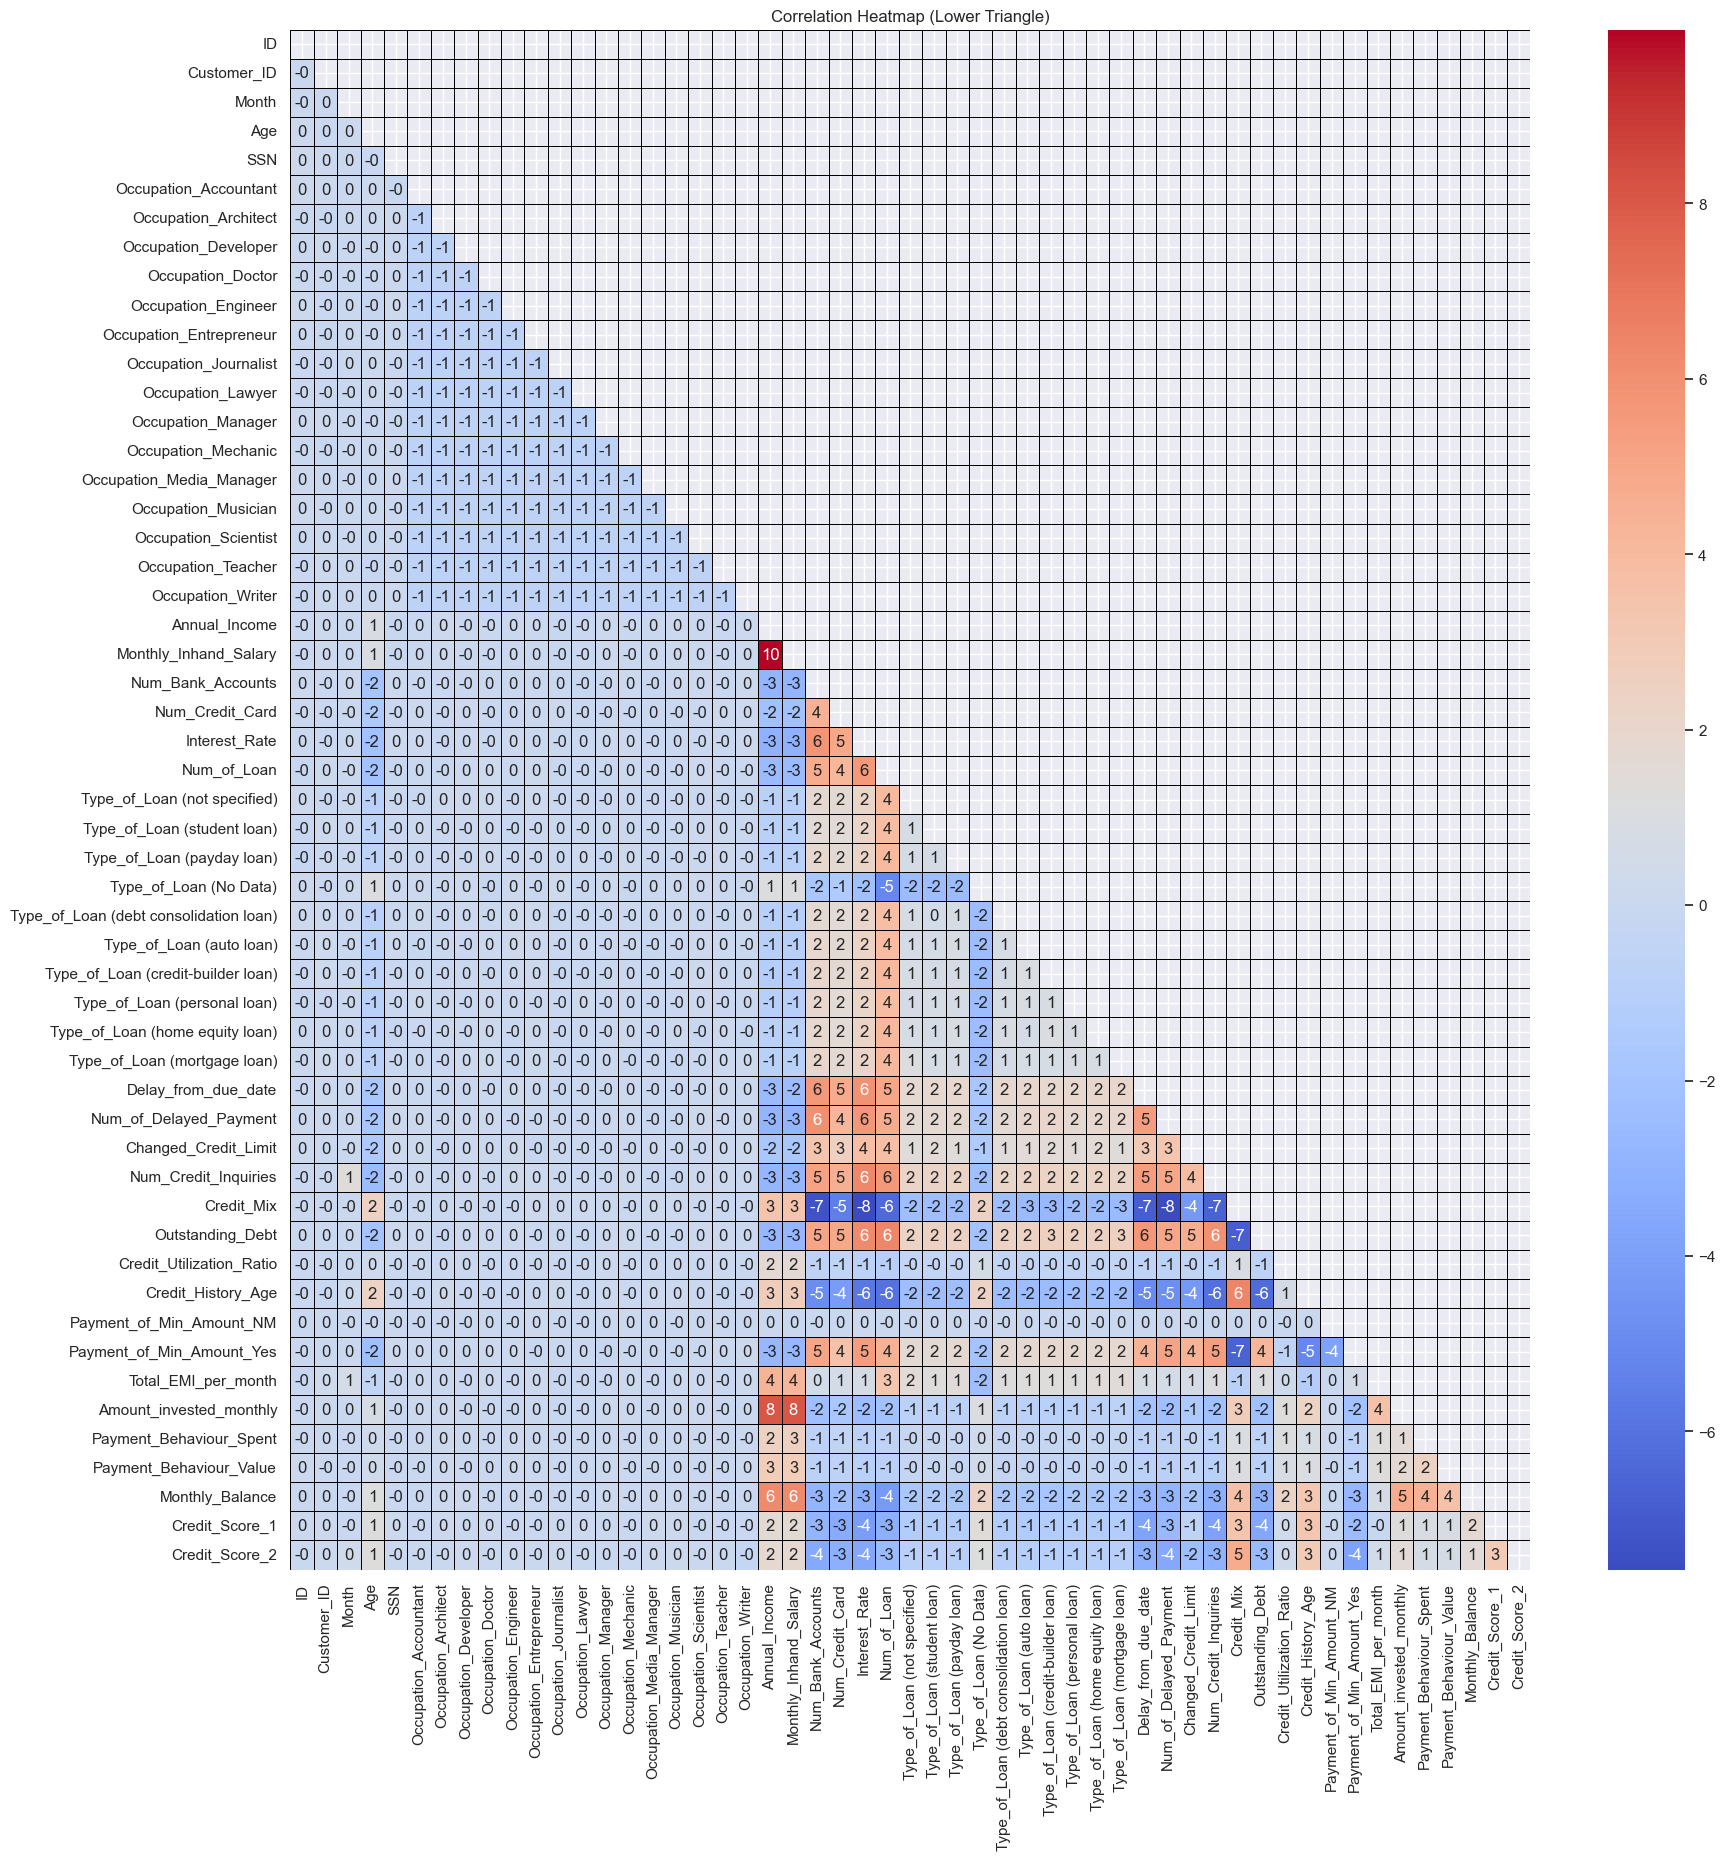

In [24]:
def compute_correlation(X_preprocessed, Y_preprocessed):
  # Drop features that are not numerical
  X_preprocessed_numerical_columns_only = X_preprocessed.drop("Name", axis=1)

  # Add the 'Credit_Score' column to the numerical features DataFrame
  X_preprocessed_numerical_columns_only = pd.concat([X_preprocessed_numerical_columns_only, Y_preprocessed], axis=1)

  # Compute the correlation matrix
  correlation_df = X_preprocessed_numerical_columns_only.corr()
  return correlation_df

def show_correlation(correlation_df):
  # Generate a mask for the upper triangle (including the diagonal)
  mask = np.triu(correlation_df)

  # Create a heatmap of the correlations
  plt.figure(figsize=(20, 20))
  sns.heatmap(correlation_df*10, mask=mask, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, linecolor='black')
  plt.title("Correlation Heatmap (Lower Triangle)")
  plt.show()

correlation_df = compute_correlation(X_preprocessed, Y_preprocessed)
show_correlation(correlation_df)

## Feature Selection



### Creating the sets with selected features and conversion to numpy

In [25]:
def feature_engineer_X(X_preprocessed, encoding_type):
  if (encoding_type == "ordinal_hot"):
    columns_X_to_train_on = [
                            #'ID',
                            'Customer_ID',
                            'Month',
                            #'Name',
                            'Age',
                            'SSN',
                            'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher','Occupation_Writer',
                            #'Annual_Income (SQRT)', #redundant with Monthly_Inhand_Salary
                            'Payment_of_Min_Amount_NM',
                            'Payment_of_Min_Amount_Yes',
                            'Monthly_Inhand_Salary (SQRT)',
                            'Num_Bank_Accounts',
                            'Num_Credit_Card',
                            'Interest_Rate',
                            'Num_of_Loan',
                            'Type_of_Loan (mortgage loan)', 'Type_of_Loan (not specified)', 'Type_of_Loan (auto loan)', 'Type_of_Loan (payday loan)', 'Type_of_Loan (debt consolidation loan)', 'Type_of_Loan (personal loan)', 'Type_of_Loan (home equity loan)', 'Type_of_Loan (student loan)', 'Type_of_Loan (credit-builder loan)', 'Type_of_Loan (No Data)',
                            'Delay_from_due_date',
                            'Num_of_Delayed_Payment',
                            'Changed_Credit_Limit',
                            'Num_Credit_Inquiries',
                            'Credit_Mix',
                            'Outstanding_Debt (SQRT)',
                            'Credit_Utilization_Ratio',
                            'Credit_History_Age',
                            'Total_EMI_per_month (LOG)',
                            'Amount_invested_monthly (LOG)',
                            'Payment_Behaviour_Spent',
                            'Payment_Behaviour_Value',
                            'Monthly_Balance (SQRT)'
                            ]
  elif (encoding_type == "ordinal"):
    columns_X_to_train_on = [
                            #'ID',
                            'Customer_ID',
                            'Month',
                            #'Name',
                            'Age',
                            'SSN',
                            'occupation_label',
                            #'Annual_Income (SQRT)', #redundant with Monthly_Inhand_Salary
                            'Payment_of_Min_Amount_label',
                            'Monthly_Inhand_Salary (SQRT)',
                            'Num_Bank_Accounts',
                            'Num_Credit_Card',
                            'Interest_Rate',
                            'Num_of_Loan',
                            'Type_of_Loan (mortgage loan)', 'Type_of_Loan (not specified)', 'Type_of_Loan (auto loan)', 'Type_of_Loan (payday loan)', 'Type_of_Loan (debt consolidation loan)', 'Type_of_Loan (personal loan)', 'Type_of_Loan (home equity loan)', 'Type_of_Loan (student loan)', 'Type_of_Loan (credit-builder loan)', 'Type_of_Loan (No Data)',
                            'Delay_from_due_date',
                            'Num_of_Delayed_Payment',
                            'Changed_Credit_Limit',
                            'Num_Credit_Inquiries',
                            'Credit_Mix',
                            'Outstanding_Debt (SQRT)',
                            'Credit_Utilization_Ratio',
                            'Credit_History_Age',
                            'Total_EMI_per_month (LOG)',
                            'Amount_invested_monthly (LOG)',
                            'Payment_Behaviour_Spent',
                            'Payment_Behaviour_Value',
                            'Monthly_Balance (SQRT)'
                            ]

  # Returning the actual columns of X
  X_feature_engineered = X_preprocessed.copy()
  X_feature_engineered = X_feature_engineered[columns_X_to_train_on]
  X_feature_engineered = np.array(X_feature_engineered)

  return X_feature_engineered


def feature_engineer_Y(Y_preprocessed):
  Y_feature_engineered = Y_preprocessed.copy()

  Y_feature_engineered = Y_preprocessed #nothing applied for now

  # Convert to numpy for the training
  Y_feature_engineered = np.array(Y_preprocessed)

  return Y_feature_engineered


## Pipeline from X and Y to X_train, X_val, y_train, y_val
Note that the real test set is the one from test_set.csv, for which we cannot know the accuracy since we don't have the labels.

In [26]:
from sklearn.model_selection import train_test_split

def get_train_data(X,X_encoding_type, Y, Y_encoding_type):
    X_preprocessed = full_preprocess_X(X, X_encoding_type)
    Y_preprocessed = full_preprocess_Y(Y, Y_encoding_type)

    X_feature_engineered = feature_engineer_X(X_preprocessed, X_encoding_type)
    Y_feature_engineered = feature_engineer_Y(Y_preprocessed)

    # Splitting the dataset
    X_train, X_val, y_train, y_val = train_test_split(X_feature_engineered, Y_feature_engineered, test_size=0.2)

    return X_train, X_val, y_train, y_val

# Model: Gradient Boosting Method

In this section we are going to build gradient boosting models. This will include 2 popular libraries such us:
- LightGBM
- XGBoost

Let's start by taking a look at our data again.

In [27]:
X_preprocessed = full_preprocess_X(X, "ordinal_hot")
Y_preprocessed = full_preprocess_Y(Y, "ordinal_label")

#plot_columns(X_preprocessed)
#plot_columns(Y_preprocessed)

Having our data prepared we will do some more slight preprocessing.
- Drop the columns ID and Name which are useless.

In [28]:
X_preprocessed = X_preprocessed.drop(["ID","Name"],axis=1)

## Test 1: GridSearch with CrossValidation (GridSearchCV) (George)
Having done that we are going to create our first simple model to see how it works in practice

In [29]:
from sklearn.model_selection import train_test_split # Library that splits data into training and test set
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y_preprocessed, test_size=0.2, random_state=42)

<b>Step 1</b>: Initialize the search space with the parameters you want.

In [30]:
# Hyper parameter tips when using LightGBM
# https://neptune.ai/blog/lightgbm-parameters-guide
# Also very usefull video https://www.youtube.com/watch?v=TvB_3jVIHhg

# 1) The num_leaves = 2^max_depth
# 2) Num_iterations (Also called num_boost_round), specifies the number of boosting trees to build. Always start small and steadily go up.
#    Also it is recommened to use SMALL learning_rate with BIG num_iterations. 
# 3) Use early_stopping_rounds to stop your model when it is not segnificantly learning.
#    Rule of thumb: 10% of the numbers of iterations.
# 4) For categorical values, we need to do a special type of pre-processing.
# 5) Method for the metric include (For classification problems) : AUC, multilogloss, multi_error
# 6) boosting_type include 3 types: gbdt, dart, goss 

# The other thing that I realized is that in training i should use a small ammount of iteration so it can be done qucikly.
# Then when the time for the actual model comes, I should use a smaller learning rate and bigger number of iterations. 

# Best Hyperparameter Values

# best_hyperparameters = ['learning_rate', 'max_bin', 'max_depth', 'num_iterations', 'num_leaves']
# best_values = [0.05, 512, 12, 10000, 48]

# make a dictionary with the gridsearch params.
# In general this should be bigger.
# I will add a proper GridSearch when we do a better feature engineering preparation.
# Also next step here is to make a proper grid search and then store it to a dataframe to analyze what is working or not.

params = {
    'learning_rate': [0.05],
    "max_depth": [12 ,24],
    "num_leaves": [48, 60],
    'subsample': [0, 0.2],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1]
    }

params_fixed ={ 
    'objective': 'multiclass', 
    'metric' : "multi_error", # Different method multi_logloss, multi_error
    'num_class':3, 
    'boosting_type':'gbdt',
    'num_iterations': 800, # Try also with 10000
    'early_stopping_rounds' : 80, # Always 10% of num_iterations
    'max_bin' : 512,
    'random_state':1
    }


<b>Step 2</b>: The next step includes
- Creating our lighGBM Classifier
- Creating a GridSearchCV using the params and the model and using accuracy as our evalution criteria
- Fitting the GridSearchCV
- Get the results for our best model

In [31]:
# The follwing procudure follows the steps of this site
# https://www.geeksforgeeks.org/cross-validation-and-hyperparameter-tuning-of-lightgbm-model/

# Initialize an empty dictionary to store the best hyperparameters and their values
best_hyperparameters = {}
best_values = {}

#Create our model. In this case it is a LightGDM Classifier
import lightgbm as lgb 

# Evalution set
eval_set = [(X_test, y_test)]

# Initialize our model
lgb_cl = lgb.LGBMClassifier(**params_fixed)

from sklearn.model_selection import GridSearchCV

# Initialize our GridSearchCV for hyperparameters
gs = GridSearchCV(estimator=lgb_cl, param_grid= params, cv=3, scoring='accuracy', n_jobs=-1, verbose=4)

# In the fit, we give the evaluation set 
gs.fit(X_train, y_train, eval_set= eval_set) # eval_set= eval_set

# Get the best hyperparameters and their values
best_params = gs.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 1142, in fit
    super().fit(
  File "c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 

[LightGBM] [Warning] early_stopping_round is set=80, early_stopping_rounds=80 will be ignored. Current value: early_stopping_round=80
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5823
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 50
[LightGBM] [Warning] early_stopping_round is set=80, early_stopping_rounds=80 will be ignored. Current value: early_stopping_round=80
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.234984
[LightGBM] [Info] Start training from score -0.632926
[LightGBM] [Info] Start training from score -1.725270
Training until validation scores don't improve for 80 rounds
Did not meet early stopping. Best iteration is:
[753]	valid_

After the GridSearch:
- We save the best parameters and best values for them.
- We save the best model gound in the GridSearch.

In [32]:
# Save the best parameters of the search

best_params = gs.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())

print(best_hyperparameters)
print(best_values)
# Best Hyperparameter Values

# best_hyperparameters = ['learning_rate', 'max_bin', 'max_depth', 'num_iterations', 'num_leaves']
# best_values = [0.05, 512, 12, 10000, 48]

# Take the best model fromm the GridSearch
best_model = gs.best_estimator_

['learning_rate', 'max_depth', 'num_leaves', 'reg_alpha', 'reg_lambda', 'subsample']
[0.05, 12, 60, 0.1, 0.1, 0.2]


Evaluate the results based on accuracy for:
- Test Accuracy 
- Train Accuracy

In [33]:
y_pred = best_model.predict(X_test, num_iteration=best_model.best_iteration_)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_test: {accuracy:.2f}')

y_pred = best_model.predict(X_train, num_iteration=best_model.best_iteration_)

# Calculate and print accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy_train: {accuracy:.2f}')

Accuracy_test: 0.80
Accuracy_train: 0.95


Accuracy_test: 0.80


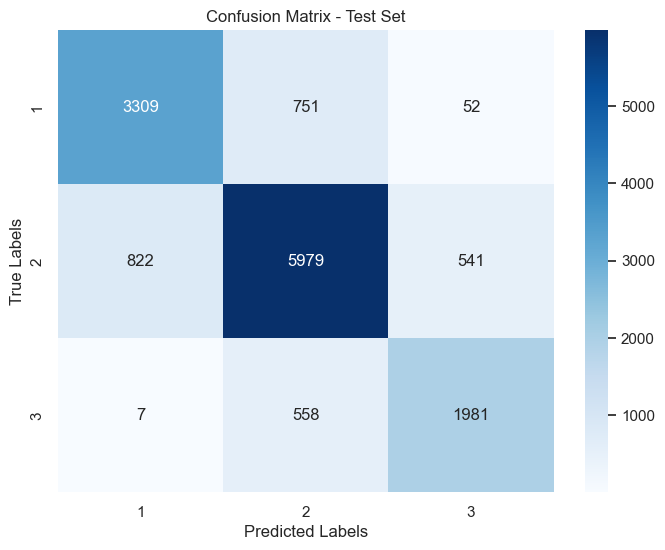

Accuracy_train: 0.95


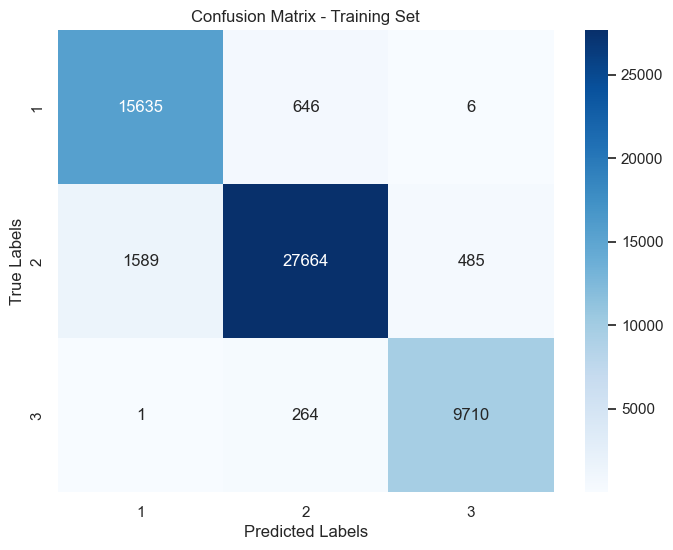

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_model is your trained LightGBM model

# Predictions on the test set
y_pred_test = best_model.predict(X_test, num_iteration=best_model.best_iteration_)

# Calculate and print accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy_test: {accuracy_test:.2f}')

# Create confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Predictions on the training set
y_pred_train = best_model.predict(X_train, num_iteration=best_model.best_iteration_)

# Calculate and print accuracy on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy_train: {accuracy_train:.2f}')

# Create confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Set')
plt.show()


## Submission George
- Here I will train the best model with the best parameters

- First we are going to train our model with the best hyperparameters that we found

In [38]:
# Train the best model for all of our data
X_train = train_set_csv.loc[:, train_set_csv.columns != "Credit_Score"]

X_train = X_train.drop(["ID","Name"],axis=1)
X_train = full_preprocess_X(X_train, "ordinal_hot")
y_train = full_preprocess_Y(train_set_csv[["Credit_Score"]], "ordinal_label")


In [39]:
## Best current params

params = {
    'learning_rate': [0.005], # Here we decrease the learning rate since the number of iterations increases
    "max_depth": [12],
    "num_leaves": [48],
    #'subsample': [0.2],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'objective': 'multiclass', 
    'metric' : "multi_error", # Different method multi_logloss, multi_error
    'num_class':3, 
    'boosting_type':'gbdt',
    'num_iterations': 30000, # Try also with 10000 to get last bits of perfomance we increase the num of iterations
    #'early_stopping_rounds' : 80, # Always 10% of num_iterations
    'max_bin' : 512,
    'random_state':1
    
    }

In [40]:
# Train the best model in all of our data
best_lgb_cl = lgb.LGBMClassifier(**params)
best_lgb_cl.fit(X_train, y_train)

c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Markou\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5823
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 50
[LightGBM] [Info] Start training from score -1.233009
[LightGBM] [Info] Start training from score -0.635418
[LightGBM] [Info] Start training from score -1.721088


LGBMClassifier(learning_rate=[0.01], max_bin=512, max_depth=[12],
               metric='multi_error', num_class=3, num_iterations=30000,
               num_leaves=[60], objective='multiclass', random_state=1,
               reg_alpha=[0.1], reg_lambda=[0.1], subsample=[0.2])

In [41]:
# Bring the whole dataset

test_set = pd.read_csv("Data/test_set.csv")
X_preprocessed = full_preprocess_X(test_set, "ordinal_hot")
X_preprocessed = X_preprocessed.drop(["ID","Name"],axis=1)
predicted_values = best_lgb_cl.predict(X_preprocessed)


# Map numerical values to categories
predicted_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
predicted_df = pd.DataFrame({"Credit_Score": predicted_values})
predicted_df["Credit_Score"] = predicted_df["Credit_Score"].map(predicted_labels)
final_df = pd.concat([test_set["ID"], predicted_df["Credit_Score"]], axis=1)
final_df

,ID,Credit_Score
0,68757,Standard
1,113371,Good
2,154933,Poor
3,77449,Poor
4,60732,Poor
...,...,...
29995,129058,Standard
29996,108661,Standard
29997,120097,Standard
29998,109412,Poor


In [42]:
final_df.to_csv('sandbox_submission.csv', index=False)

# Model: Neural Network Regression

## Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import LambdaCallback
import time
from tensorflow.keras.optimizers import Adam

from keras.regularizers import l2

def train_nn_regression(X_train, X_val, y_train, y_val, epoch, batch_size, lambda_value, learning_rate, Y_encoding_type):

    print(f'Training with epoch={epoch}, batch_size={batch_size}, lambda_value={lambda_value}, learning_rate={learning_rate}, Y_encoding_type={Y_encoding_type}...')
    # Build the neural network with L2 regularization
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value), input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(lambda_value)))
    model.add(BatchNormalization())


    optimizer = Adam(learning_rate=learning_rate)
    # Layer & loss for Ordinal label
    if Y_encoding_type == "ordinal_label":
      model.add(Dense(1, activation='linear'))
      model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Layer & loss for Ordinal hot
    elif Y_encoding_type == "ordinal_hot":
      model.add(Dense(2, activation='sigmoid'))
      model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Layer & loss for One Hot
    elif Y_encoding_type == "one_hot":
      model.add(Dense(3, activation='softmax'))
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #If wrong encoding
    else:
      print("encoding error")


    # Train the model
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    end_time = time.time()
    duration = end_time - start_time
    print(f"Training duration: {duration / 60:.2f} minutes")

    # Short learning curve
    plt.figure(figsize=(8, 4))

    plt.plot(history.history['loss'], label='Train')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()
    return model, history, duration

## Evaluation

In [ ]:
#Evaluate
from sklearn.metrics import accuracy_score

def predict_numbers(X, model, Y_encoding_type):
  # Make the predictions, that can be any real number
  numbers_predicted = model.predict(X, verbose=0)

  if Y_encoding_type == "ordinal_label":
    # Convert to 1, 2 or 3
    numbers_predicted[numbers_predicted < 1.5] = 1
    numbers_predicted[numbers_predicted > 2.5] = 3
    numbers_predicted[(numbers_predicted >= 1.5) & (numbers_predicted <= 2.5)] = 2

  elif Y_encoding_type == "ordinal_hot":
    # Round to 0 and 1
    numbers_predicted[numbers_predicted < 0.5] = 0
    numbers_predicted[numbers_predicted >= 0.5] = 1
    # Create a new array to hold the results
    result = np.zeros(numbers_predicted.shape[0])
    # Applying the condition
    result[np.all(numbers_predicted == [0, 0], axis=1)] = 1
    result[np.all(numbers_predicted == [1, 0], axis=1)] = 2
    result[np.all(numbers_predicted == [1, 1], axis=1)] = 3

  elif Y_encoding_type == "one_hot":
    # Round to 0 and 1
    numbers_predicted[numbers_predicted < 0.5] = 0
    numbers_predicted[numbers_predicted >= 0.5] = 1
    # Create a new array to hold the results
    result = np.zeros(numbers_predicted.shape[0])
    # Applying the condition
    result[np.all(numbers_predicted == [1, 0, 0], axis=1)] = 1
    result[np.all(numbers_predicted == [0, 1, 0], axis=1)] = 2
    result[np.all(numbers_predicted == [0, 0, 1], axis=1)] = 3

  else:
    print("encoding error")

  return numbers_predicted

def evaluate_nn_regression(X_train, X_val, y_train, y_val, model, Y_encoding_type):

    #Train
    numbers_predicted_from_train = predict_numbers(X_train, model, Y_encoding_type)
    true_categories_train = y_train.astype(int)

    # Calculate accuracy
    accuracy_train = accuracy_score(true_categories_train, numbers_predicted_from_train)
    print(f"Accuracy train: {accuracy_train*100:.2f}%")

    #Test
    numbers_predicted_from_test = predict_numbers(X_val, model, Y_encoding_type)
    true_categories_test = y_val.astype(int)

    # Calculate accuracy
    accuracy_test = accuracy_score(true_categories_test, numbers_predicted_from_test)
    print(f"Accuracy test: {accuracy_test*100:.2f}%")

    return accuracy_train, accuracy_test

### Execution

In [ ]:
def full_pipeline(X, Y, Y_encoding_type, epoch, batch_size, lambda_value, learning_rate):
    #Creating sets
    X_train, X_val, y_train, y_val = get_train_data(X, Y, Y_encoding_type)
    #Training
    model, history, duration = train_nn_regression(X_train, X_val, y_train, y_val, epoch=epoch, batch_size=batch_size, lambda_value=lambda_value, learning_rate=learning_rate, Y_encoding_type=Y_encoding_type)
    #Evaluating
    accuracy_train, accuracy_test = evaluate_nn_regression(X_train, X_val, y_train, y_val, model, Y_encoding_type=Y_encoding_type)
    return accuracy_train, accuracy_test, duration

### Robin's Sandbox (Hyperparameter tuning)
#### Tests to see what affect the hyperparameters

Interesting to note: model perform better (76%) when I put all the features (except the name), even compared to when I remove only the very correlated features

Training with epoch=50, batch_size=512, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 0.72 minutes


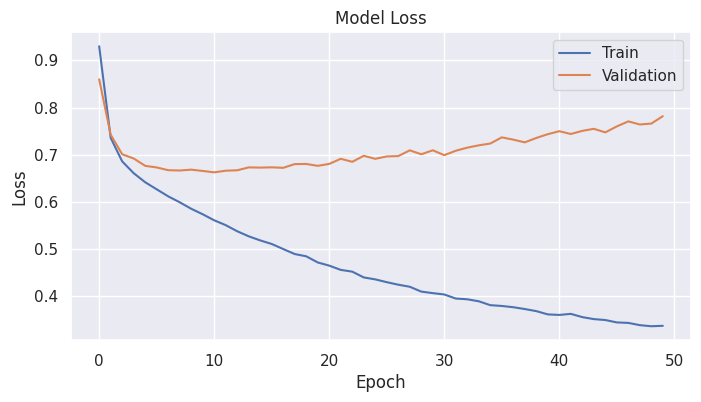

Accuracy train: 87.53%
Accuracy test: 71.66%
Training with epoch=50, batch_size=256, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 0.72 minutes


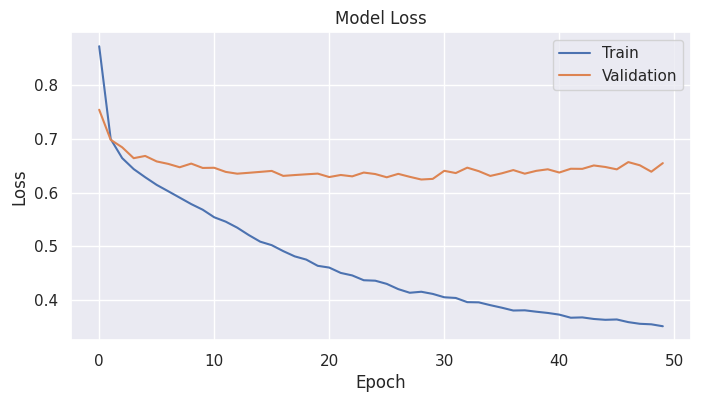

Accuracy train: 87.69%
Accuracy test: 74.64%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.40 minutes


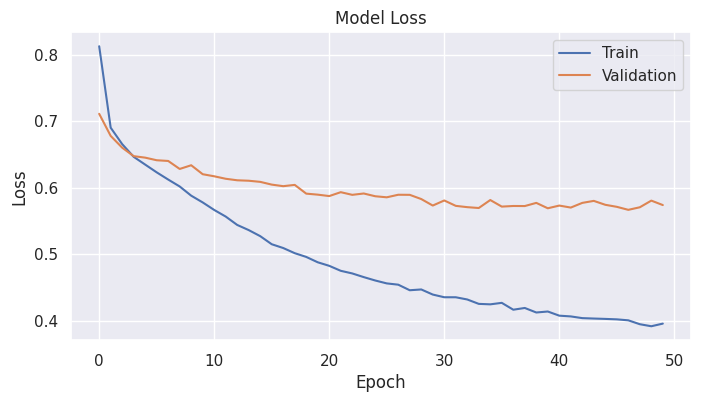

Accuracy train: 86.33%
Accuracy test: 76.66%
Training with epoch=50, batch_size=64, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 2.40 minutes


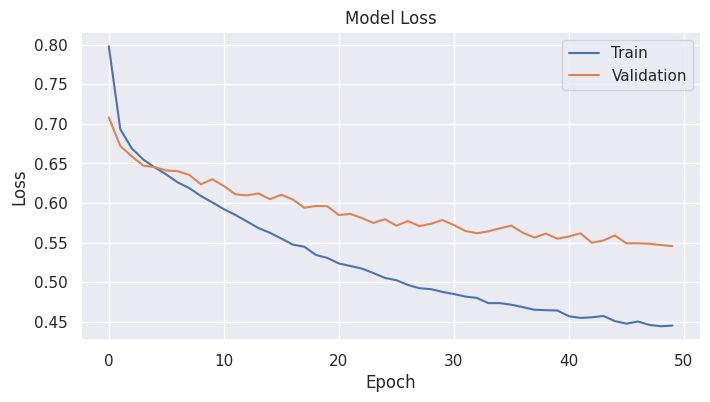

Accuracy train: 83.74%
Accuracy test: 75.51%
Training with epoch=50, batch_size=32, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 3.32 minutes


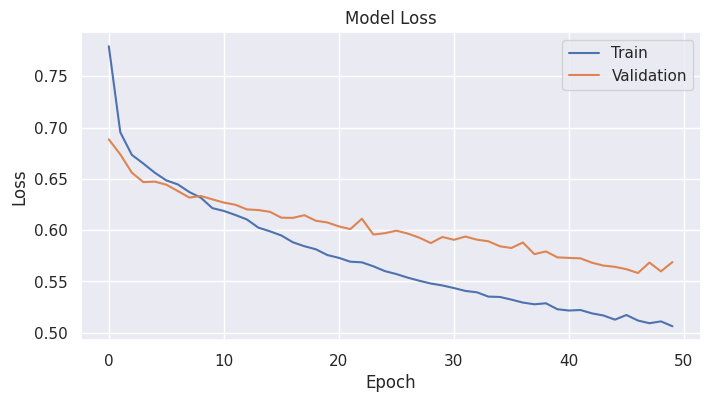

Accuracy train: 78.46%
Accuracy test: 72.45%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.0001, Y_encoding_type=one_hot...
Training duration: 1.40 minutes


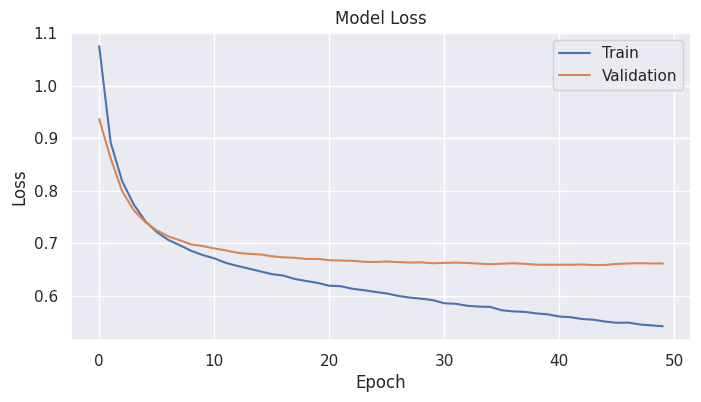

Accuracy train: 76.32%
Accuracy test: 68.96%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.03 minutes


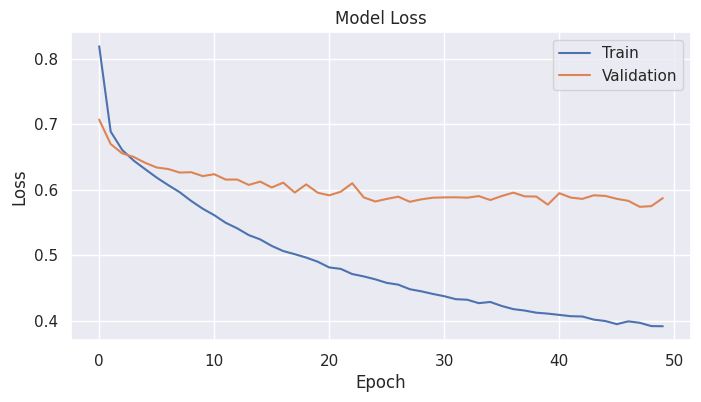

Accuracy train: 86.13%
Accuracy test: 75.99%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.01, Y_encoding_type=one_hot...
Training duration: 1.40 minutes


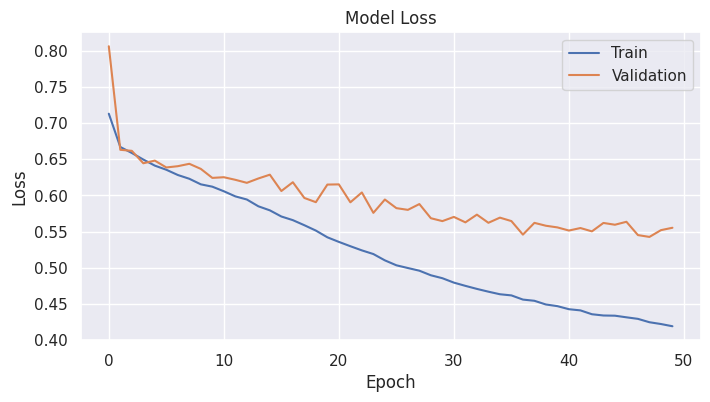

Accuracy train: 84.01%
Accuracy test: 76.33%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.02 minutes


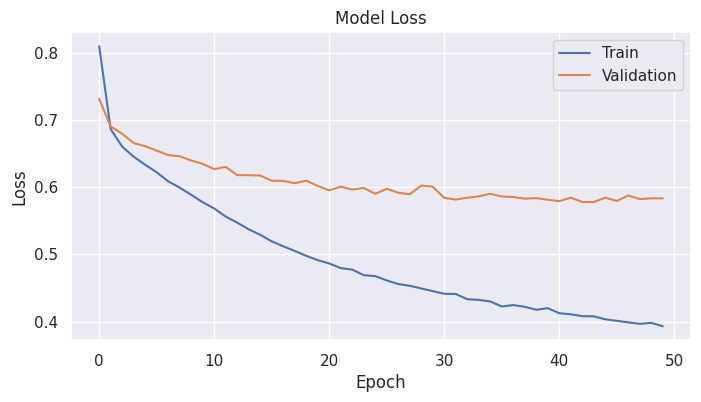

Accuracy train: 86.22%
Accuracy test: 75.36%
Training with epoch=50, batch_size=128, lambda_value=1e-05, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.05 minutes


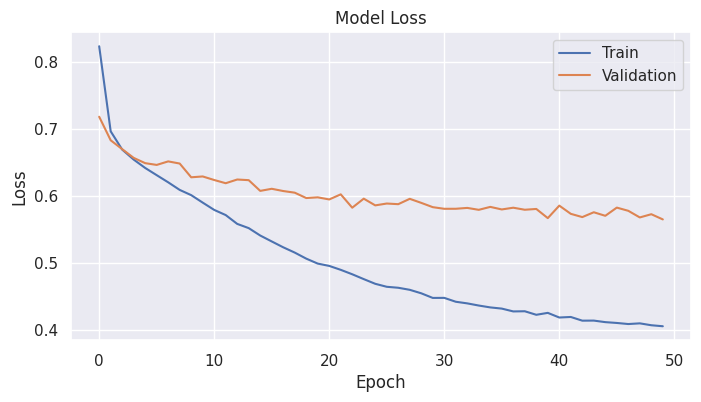

Accuracy train: 86.11%
Accuracy test: 76.88%
Training with epoch=50, batch_size=128, lambda_value=0.0001, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.40 minutes


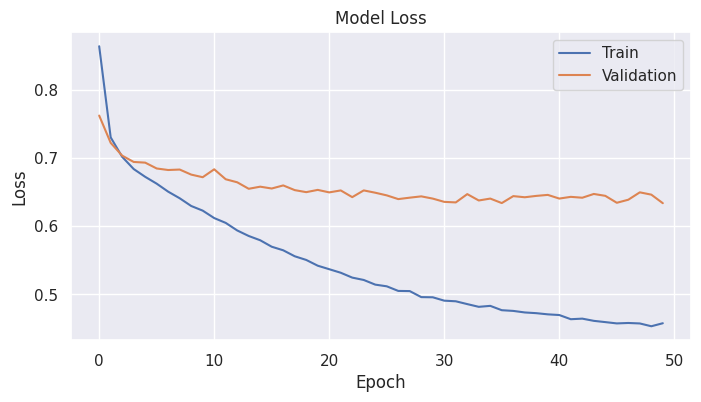

Accuracy train: 85.18%
Accuracy test: 75.45%
Training with epoch=50, batch_size=128, lambda_value=0.001, learning_rate=0.001, Y_encoding_type=one_hot...
Training duration: 1.03 minutes


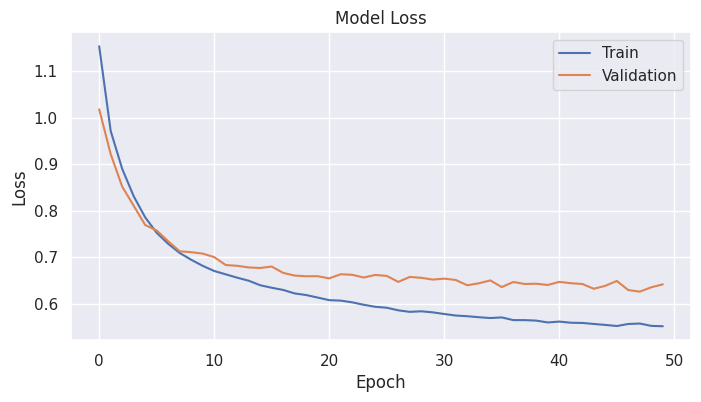

Accuracy train: 81.04%
Accuracy test: 75.49%
Training with epoch=50, batch_size=512, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 0.72 minutes


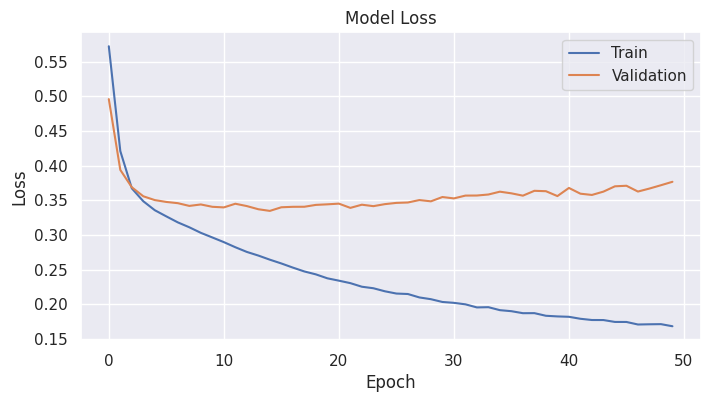

Accuracy train: 88.60%
Accuracy test: 72.51%
Training with epoch=50, batch_size=256, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 0.68 minutes


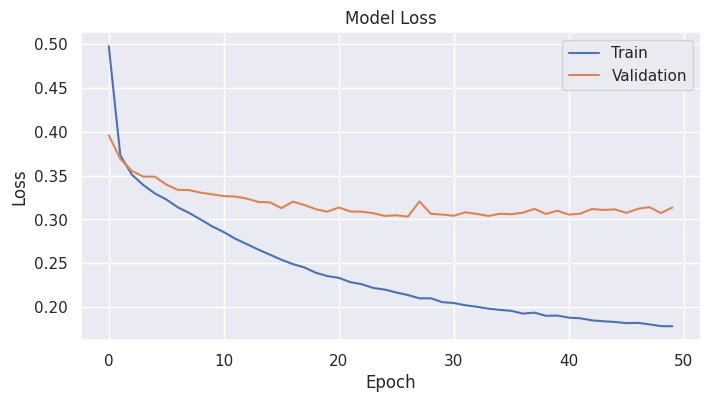

Accuracy train: 88.34%
Accuracy test: 76.51%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.40 minutes


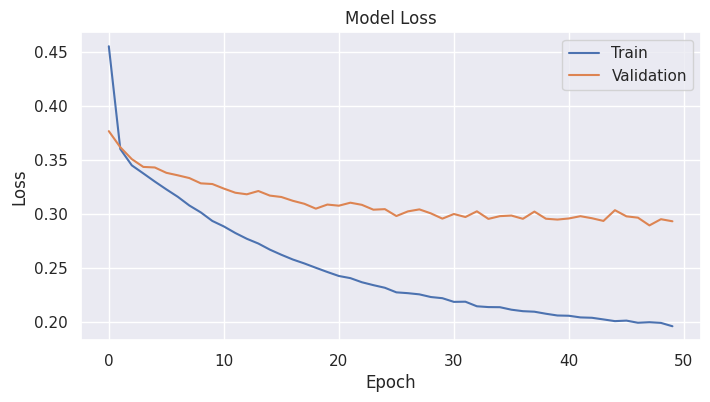

Accuracy train: 86.84%
Accuracy test: 77.69%
Training with epoch=50, batch_size=64, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.77 minutes


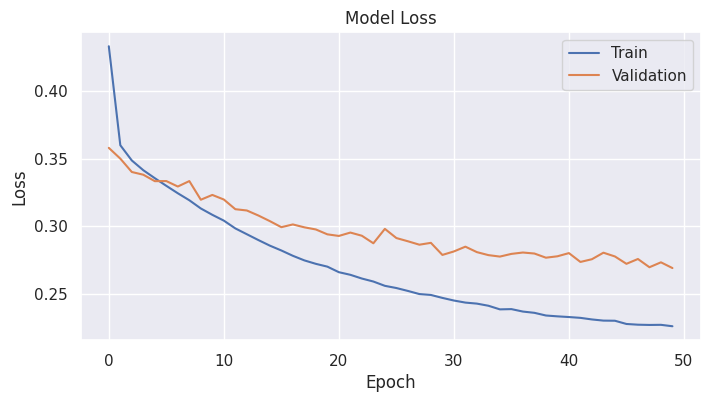

Accuracy train: 85.12%
Accuracy test: 77.67%
Training with epoch=50, batch_size=32, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 3.44 minutes


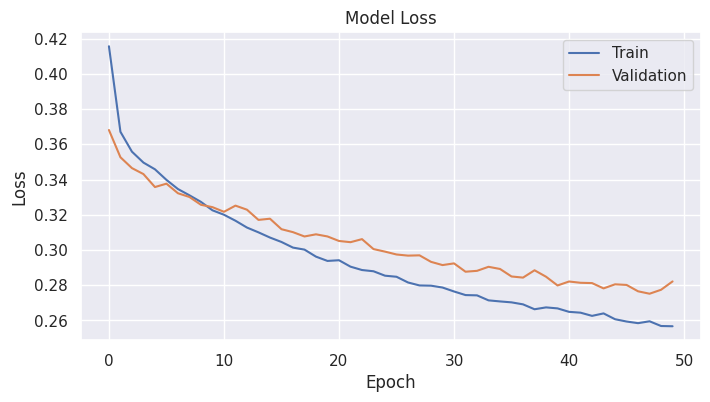

Accuracy train: 80.83%
Accuracy test: 75.61%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.0001, Y_encoding_type=ordinal_hot...
Training duration: 1.40 minutes


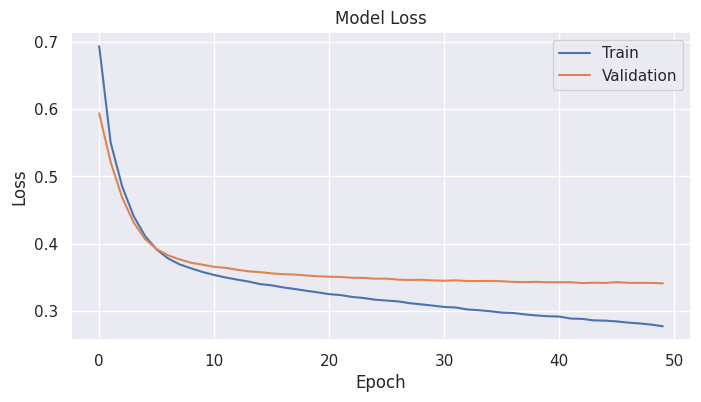

Accuracy train: 78.96%
Accuracy test: 70.80%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.40 minutes


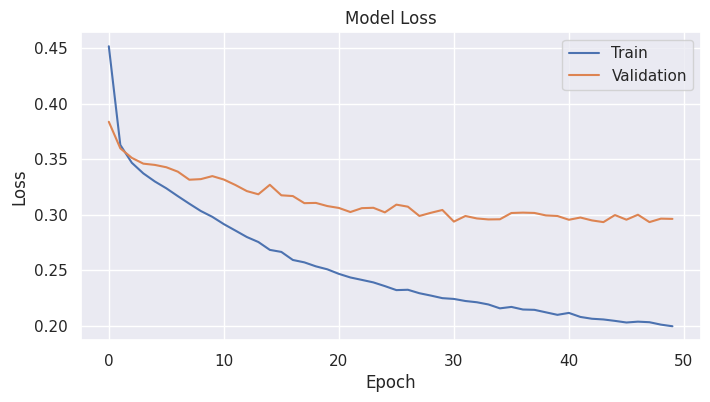

Accuracy train: 86.93%
Accuracy test: 77.06%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.01, Y_encoding_type=ordinal_hot...
Training duration: 1.08 minutes


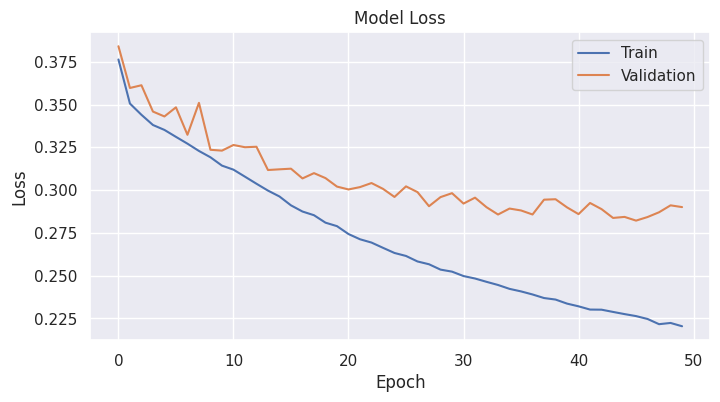

Accuracy train: 83.12%
Accuracy test: 76.76%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.03 minutes


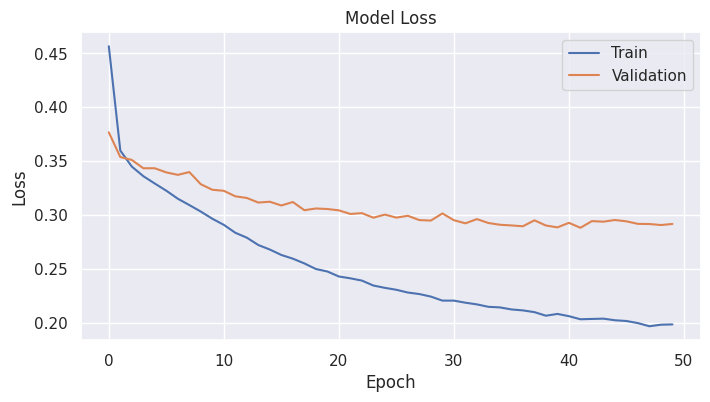

Accuracy train: 86.61%
Accuracy test: 76.81%
Training with epoch=50, batch_size=128, lambda_value=1e-05, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.40 minutes


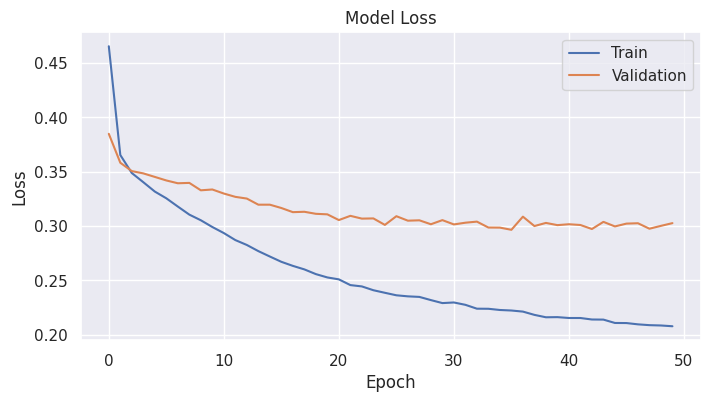

Accuracy train: 86.39%
Accuracy test: 76.64%
Training with epoch=50, batch_size=128, lambda_value=0.0001, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.40 minutes


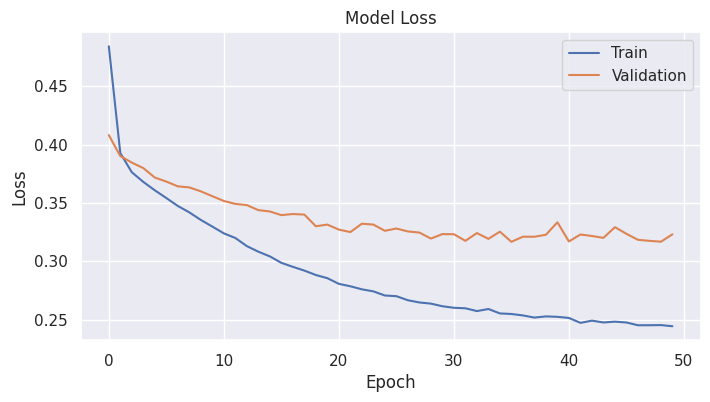

Accuracy train: 84.70%
Accuracy test: 76.42%
Training with epoch=50, batch_size=128, lambda_value=0.001, learning_rate=0.001, Y_encoding_type=ordinal_hot...
Training duration: 1.41 minutes


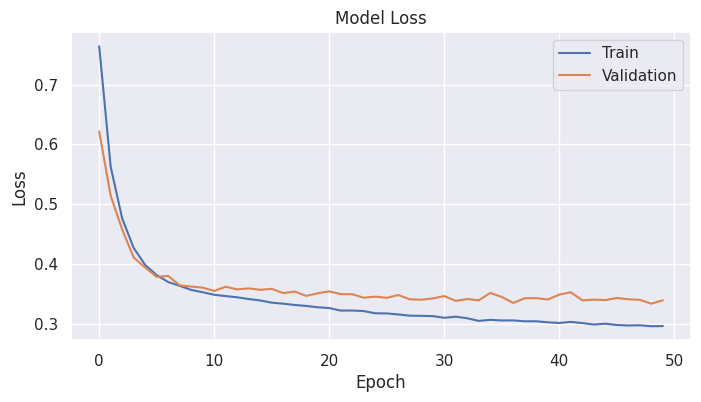

Accuracy train: 79.17%
Accuracy test: 74.41%
Training with epoch=50, batch_size=512, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 0.72 minutes


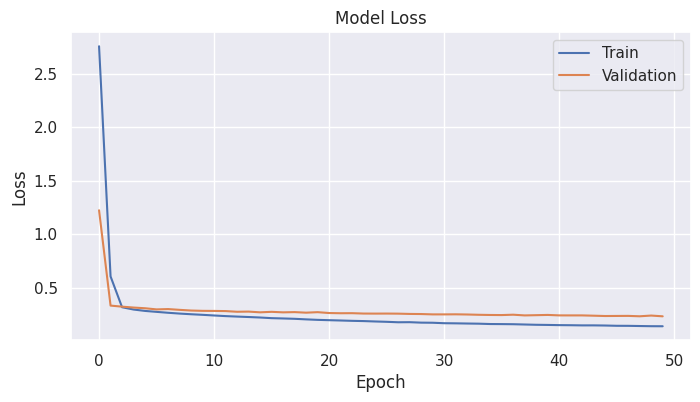

Accuracy train: 84.42%
Accuracy test: 72.18%
Training with epoch=50, batch_size=256, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 0.66 minutes


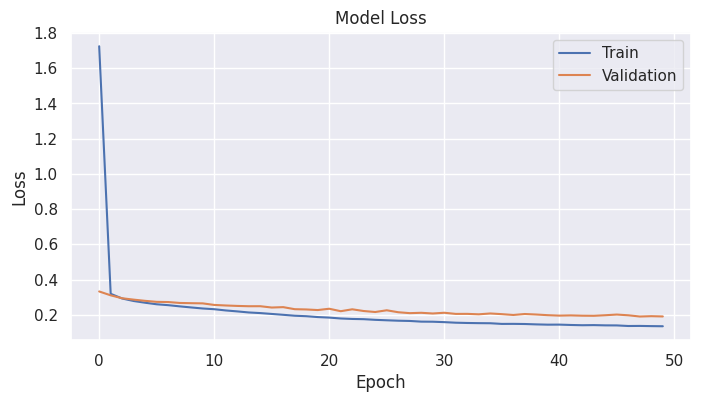

Accuracy train: 85.79%
Accuracy test: 76.33%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 1.40 minutes


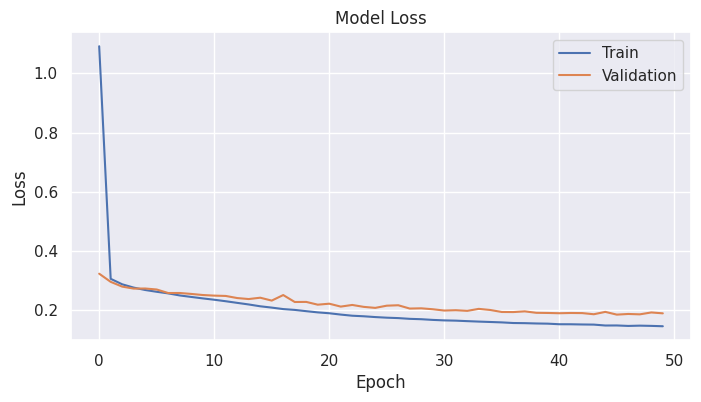

Accuracy train: 84.21%
Accuracy test: 77.22%
Training with epoch=50, batch_size=64, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 2.39 minutes


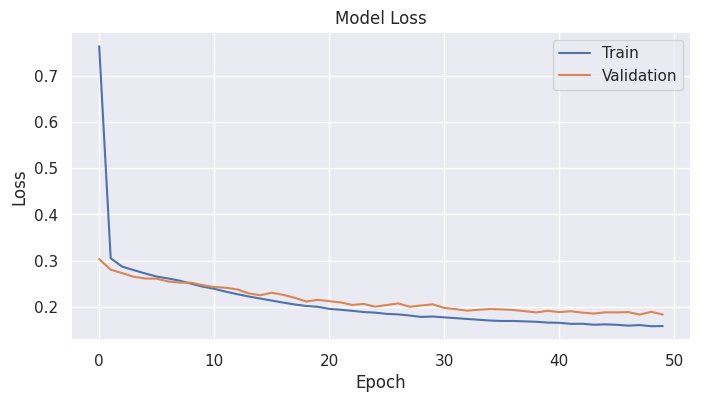

Accuracy train: 83.51%
Accuracy test: 77.30%
Training with epoch=50, batch_size=32, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 3.39 minutes


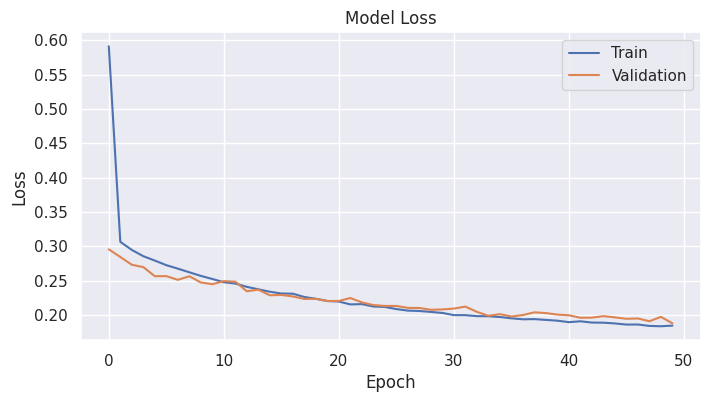

Accuracy train: 81.37%
Accuracy test: 77.09%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.0001, Y_encoding_type=ordinal_label...
Training duration: 1.00 minutes


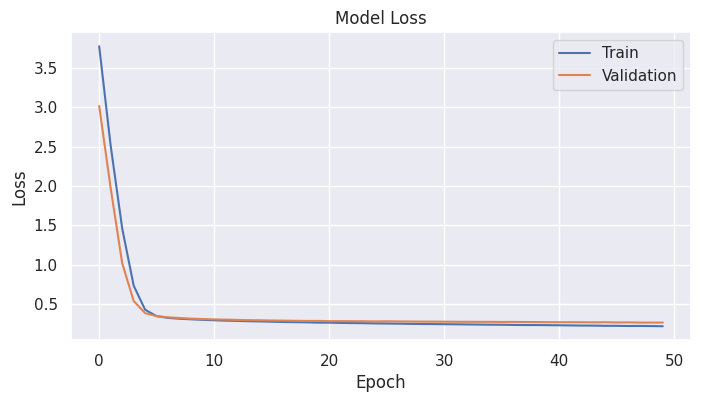

Accuracy train: 74.45%
Accuracy test: 68.33%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 1.40 minutes


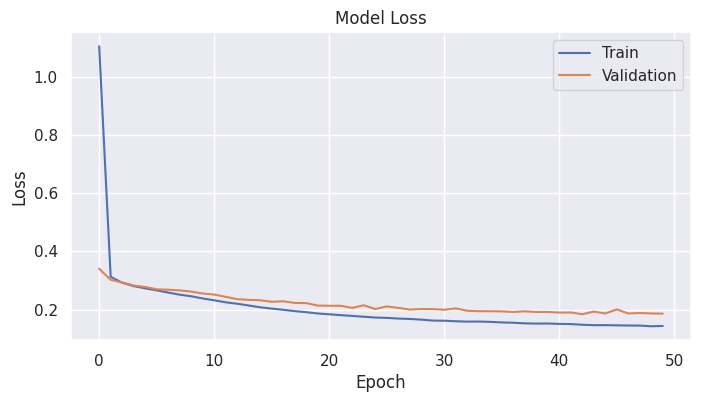

Accuracy train: 84.87%
Accuracy test: 76.68%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.01, Y_encoding_type=ordinal_label...
Training duration: 1.43 minutes


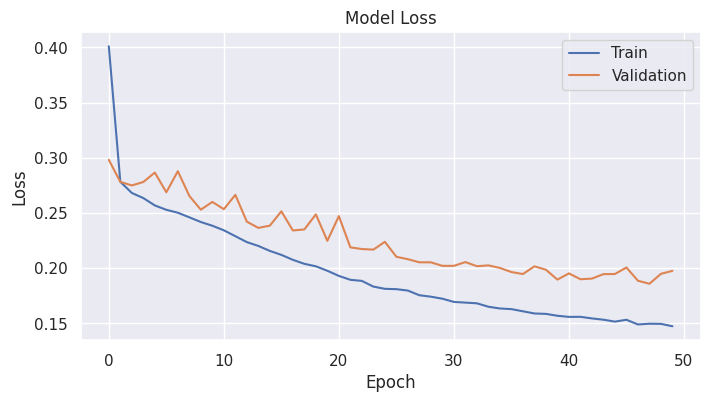

Accuracy train: 82.50%
Accuracy test: 76.21%
Training with epoch=50, batch_size=128, lambda_value=0, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 1.40 minutes


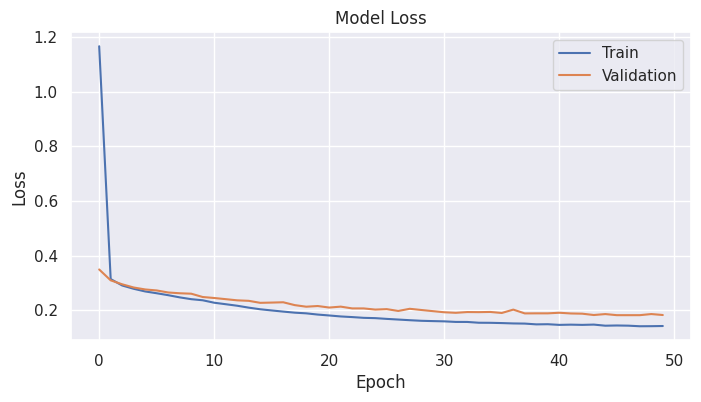

Accuracy train: 85.36%
Accuracy test: 77.17%
Training with epoch=50, batch_size=128, lambda_value=1e-05, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 1.40 minutes


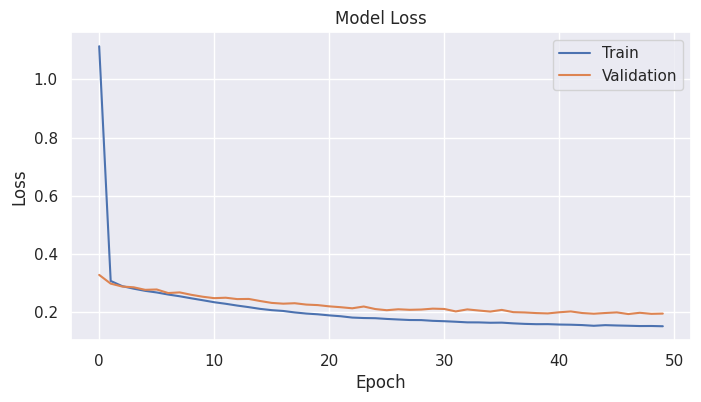

Accuracy train: 84.98%
Accuracy test: 76.94%
Training with epoch=50, batch_size=128, lambda_value=0.0001, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 0.99 minutes


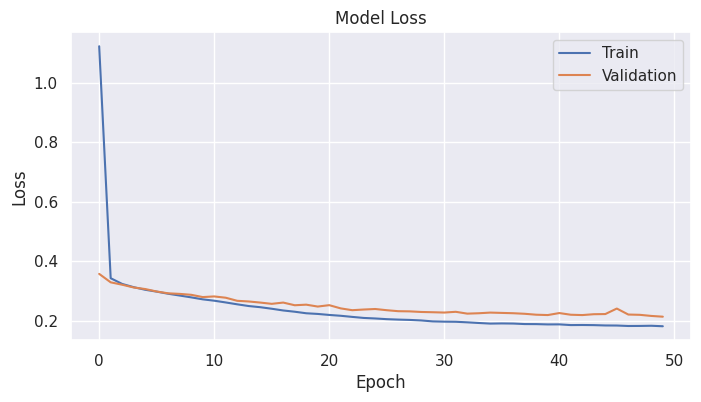

Accuracy train: 83.41%
Accuracy test: 77.17%
Training with epoch=50, batch_size=128, lambda_value=0.001, learning_rate=0.001, Y_encoding_type=ordinal_label...
Training duration: 1.40 minutes


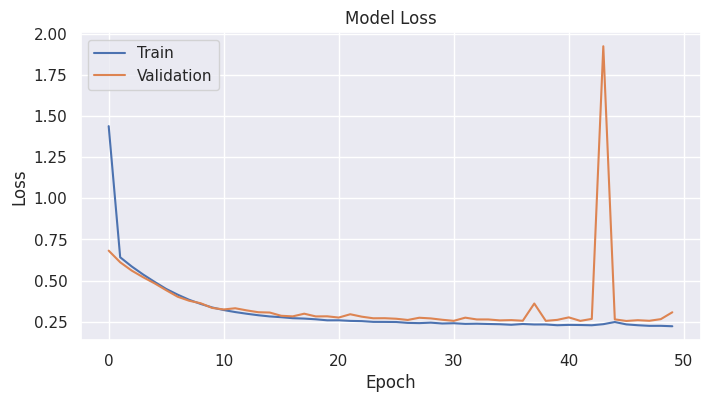

Accuracy train: 74.18%
Accuracy test: 70.62%


,Y_encoding_type,epochs,batch_size,lambda_value,learning_rate,accuracy_train,accuracy_test,duration
0,one_hot,50,512,0,0.0010,0.875321,0.716571,42.947208
1,one_hot,50,256,0,0.0010,0.876929,0.746357,43.385626
2,one_hot,50,128,0,0.0010,0.863339,0.766571,83.949260
3,one_hot,50,64,0,0.0010,0.837446,0.755071,144.170075
4,one_hot,50,32,0,0.0010,0.784589,0.724500,198.927184
5,one_hot,50,128,0,0.0001,0.763214,0.689571,84.010329
6,one_hot,50,128,0,0.0010,0.861321,0.759929,61.538920
7,one_hot,50,128,0,0.0100,0.840054,0.763286,83.955699
8,one_hot,50,128,0,0.0010,0.862196,0.753571,60.904199
9,one_hot,50,128,0.00001,0.0010,0.861125,0.768786,62.836592


In [ ]:
# History DataFrame
history = pd.DataFrame(columns=["Y_encoding_type", "epochs", "batch_size", "lambda_value", "learning_rate", "accuracy_train", "accuracy_test", "duration"])

# Default values
default_Y_encoding_type = "ordinal_hot"
default_epochs = 50
default_batch_size = 128
default_lambda_value = 0
default_learning_rate = 0.001

#Test hyperparameter on every encoding
for Y_encoding_type in ["one_hot", "ordinal_hot", "ordinal_label"]:
  # Test batch_size
  for batch_size in [512, 256, 128, 64, 32]:
    epochs, lambda_value, learning_rate = default_epochs, default_lambda_value, default_learning_rate  # Reset to default values
    accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, epochs, batch_size, lambda_value, learning_rate)
    new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
    history = pd.concat([history, new_row], ignore_index=True)

  # Test learning_rate
  for learning_rate in [0.0001, 0.001, 0.01]:
    epochs, batch_size, lambda_value = default_epochs, default_batch_size, default_lambda_value  # Reset to default values
    accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, epochs, batch_size, lambda_value, learning_rate)
    new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
    history = pd.concat([history, new_row], ignore_index=True)

  # Test lambda_value
  for lambda_value in [0, 0.00001, 0.0001, 0.001]:
    epochs, batch_size, learning_rate = default_epochs, default_batch_size, default_learning_rate  # Reset to default values
    accuracy_train, accuracy_test, duration = full_pipeline(X, Y, Y_encoding_type, epochs, batch_size, lambda_value, learning_rate)
    new_row = pd.DataFrame([{"Y_encoding_type": Y_encoding_type, "epochs": epochs, "batch_size": batch_size, "lambda_value": lambda_value, "learning_rate": learning_rate, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test, "duration": duration}])
    history = pd.concat([history, new_row], ignore_index=True)

# Display the DataFrame
display(history)


In [ ]:
# WE MIGHT HAVE TO FIND A BETTER PLACE TO PUT THAT

def transform_back_to_categories(numbers_predicted):

  # Show how to convert back
  credit_score_mapping = {1: 'Poor', 2: 'Standard', 3: 'Good'}

  # Create a df
  numbers_predicted_flat = numbers_predicted.flatten()
  numbers_predicted_df = pd.DataFrame({'Credit_Score': numbers_predicted_flat})

  # Applying ordinal encoding
  categories_predicted = numbers_predicted_df['Credit_Score'].map(credit_score_mapping).to_frame('Credit_Score')

  return categories_predicted

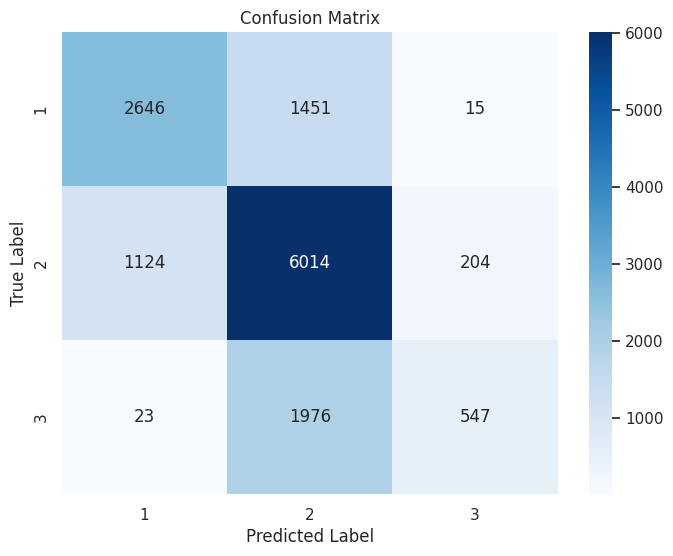

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix():
  # Calculate the confusion matrix
  cm = confusion_matrix(true_categories_test, numbers_predicted_from_test)

  # Plotting the heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
  plt.title("Confusion Matrix")
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Generate submission

In [ ]:
def load_test_data():
    # Load the test data
    test_set_csv = pd.read_csv('test_set.csv')
    return test_set_csv

train_set_csv = load_test_data()

# Understand shape of data
print(f'Shape: {train_set_csv.shape}')

# Check for duplicates
num_duplicates = train_set_csv.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Check for missing values
num_missing = train_set_csv.isnull().sum().sum()
print(f'Number of missing values: {num_missing}')

Shape: (30000, 27)
Number of duplicate rows: 0
Number of missing values: 0


In [ ]:
def prepare_X_test_csv(test_set_csv):

  X_test_csv_prepared = test_set_csv.copy()

  X_test_csv_prepared = full_preprocess_X(X_test_csv_prepared)
  X_test_csv_prepared = feature_engineer_X(X_test_csv_prepared)

  return X_test_csv_prepared



In [ ]:
def predict_test_categories(X_test_csv_prepared):
  numbers_predicted = predict_numbers(X_test_csv_prepared)
  categories_predicted = transform_back_to_categories(numbers_predicted)
  return categories_predicted



In [ ]:
def generate_submission():
    # DON'T FORGET TO TRAIN ON THE ENTIRE SET (TRAIN + CROSS VALIDATION), NOT JUST TRAIN SET
    test_set_csv = load_test_data()
    X_test_csv_prepared = prepare_X_test_csv(test_set_csv)
    predicted_test_categories = predict_test_categories(X_test_csv_prepared)
    final_df = pd.concat([test_set_csv["ID"], predicted_test_categories["Credit_Score"]], axis=1)
    final_df.to_csv('sandbox_submission.csv', index=False)

generate_submission()

938/938 [==============================] - 2s 2ms/step
